# Credit Card Users Churn Prediction

## Background

This is for Thera Bank.  They are seeing that there is a decrease in credit card usage.  This is bad for Thera because they make a lot of money off of credit cards.  Thera is looking to analyze some of their customers to see who is likely to leave the bank's credit card services.  Ideally, I can identify trends in the data and answer the key question for them.

## Key Question to Answer

Will a given customer leave the bank's credit card services (churn)? What are the biggest indicators of someone leaving the bank? What variables play the biggest role?


## Dataset
#### The lines below give a brief definition of each variable in the dataset:

CLIENTNUM: Client number. Unique identifier for the customer holding the account.

Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer".

Customer_Age: Age in Years.

Gender: Gender of the account holder.

Dependent_count: Number of dependents.

Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.

Marital_Status: Marital Status of the account holder.

Income_Category: Annual Income Category of the account holder.

Card_Category: Type of Card.

Months_on_book: Period of relationship with the bank.

Total_Relationship_Count: Total no. of products held by the customer.

Months_Inactive_12_mon: No. of months inactive in the last 12 months.

Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months.

Credit_Limit: Credit Limit on the Credit Card.

Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance.

Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months).

Total_Trans_Amt: Total Transaction Amount (Last 12 months).

Total_Trans_Ct: Total Transaction Count (Last 12 months).

Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter.

Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter.

Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [1]:
# To help make our code look less cluttered, this removes the warnings that pop up.
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Importing the packages for this project

%load_ext nb_black

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline


# Splitting data in train and test splits
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune our models
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# To get some different metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Bagging and Boosting
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# To oversample and undersample our data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, cross_val_score


# Pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

<IPython.core.display.Javascript object>

In [3]:
# Reading our dataset titled "BankChurners.csv".
file = pd.read_csv("BankChurners.csv")

# Making a copy of the dataset, so I am not making any changes to the original file.
data = file.copy()


<IPython.core.display.Javascript object>

In [4]:
# Viewing the first 5 rows of the dataset
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

<IPython.core.display.Javascript object>

In [5]:
# Viewing the last 5 rows of the dataset
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

<IPython.core.display.Javascript object>

In [6]:
# Looking at the shape of the dataset
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

#### Observations
There is 10127 rows and 21 columns in the dataset

In [7]:
# Looking at the data types of our variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

#### Observations
I am going to need to change several variables to categorical datatypes for modeling purposes.

In [8]:
# Let's drop the CLIENTNUM column, as it is just an identifier column
data.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [9]:
# Turning Attrition_Flag, our target variable, into 0's and 1's. I want this to be a binary variable for model building
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# I will now convert some other datatypes
data["Gender"] = data["Gender"].astype("category")
data["Dependent_count"] = data["Dependent_count"].astype("category")
data["Education_Level"] = data["Education_Level"].astype("category")
data["Marital_Status"] = data["Marital_Status"].astype("category")
data["Income_Category"] = data["Income_Category"].astype("category")
data["Card_Category"] = data["Card_Category"].astype("category")
data["Months_Inactive_12_mon"] = data["Months_Inactive_12_mon"].astype("category")
data["Contacts_Count_12_mon"] = data["Contacts_Count_12_mon"].astype("category")

<IPython.core.display.Javascript object>

In [11]:
# Looking at our changed datatypes to make sure they are what I want them to be
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

In [12]:
# Let's check the options for Income_Category, Education_Level, and Marital_Status. I noticed some issues.
print(data["Income_Category"].unique())
print("\n")
print(data["Education_Level"].unique())
print("\n")
print(data["Marital_Status"].unique())

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'abc']
Categories (6, object): ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'abc']


['High School', 'Graduate', 'Uneducated', NaN, 'College', 'Post-Graduate', 'Doctorate']
Categories (6, object): ['High School', 'Graduate', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']


['Married', 'Single', NaN, 'Divorced']
Categories (3, object): ['Married', 'Single', 'Divorced']


<IPython.core.display.Javascript object>

#### Observations
There are some errors in these variables; I need to change the invalid categories to np.NaN.  I will be imputing the most frequent category later after splitting the data into train and test sets.

In [13]:
# Changing the invalid categories to np.NaN
data["Income_Category"].replace("abc", np.NaN, inplace=True)
data["Education_Level"].replace("N/A", np.NaN, inplace=True)
data["Marital_Status"].replace("NaN", np.NaN, inplace=True)

<IPython.core.display.Javascript object>

In [14]:
# Verifying my fix
print(data["Income_Category"].unique())
print("\n")
print(data["Education_Level"].unique())
print("\n")
print(data["Marital_Status"].unique())

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', NaN]
Categories (5, object): ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +']


['High School', 'Graduate', 'Uneducated', NaN, 'College', 'Post-Graduate', 'Doctorate']
Categories (6, object): ['High School', 'Graduate', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']


['Married', 'Single', NaN, 'Divorced']
Categories (3, object): ['Married', 'Single', 'Divorced']


<IPython.core.display.Javascript object>

In [15]:
# Let's get an understanding on missing values in our dataset
data.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Income_Category             1112
Marital_Status               749
Avg_Utilization_Ratio          0
Total_Ct_Chng_Q4_Q1            0
Customer_Age                   0
Gender                         0
Dependent_count                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Attrition_Flag                 0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations
The missing values are for the categories mentioned earlier. I am going to impute the most common category using SimpleImputer later.

In [16]:
# Giving us some basic numbers in regards to our dataset. ".T" is to transpose the data.
data.describe().T

count         mean          std     min       25%  \
Attrition_Flag            10127.0     0.160660     0.367235     0.0     0.000   
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Attrition_Flag               0.000      0.000      1.000  
Customer_Age                46.000     52.000     73.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

<IPython.core.display.Javascript object>

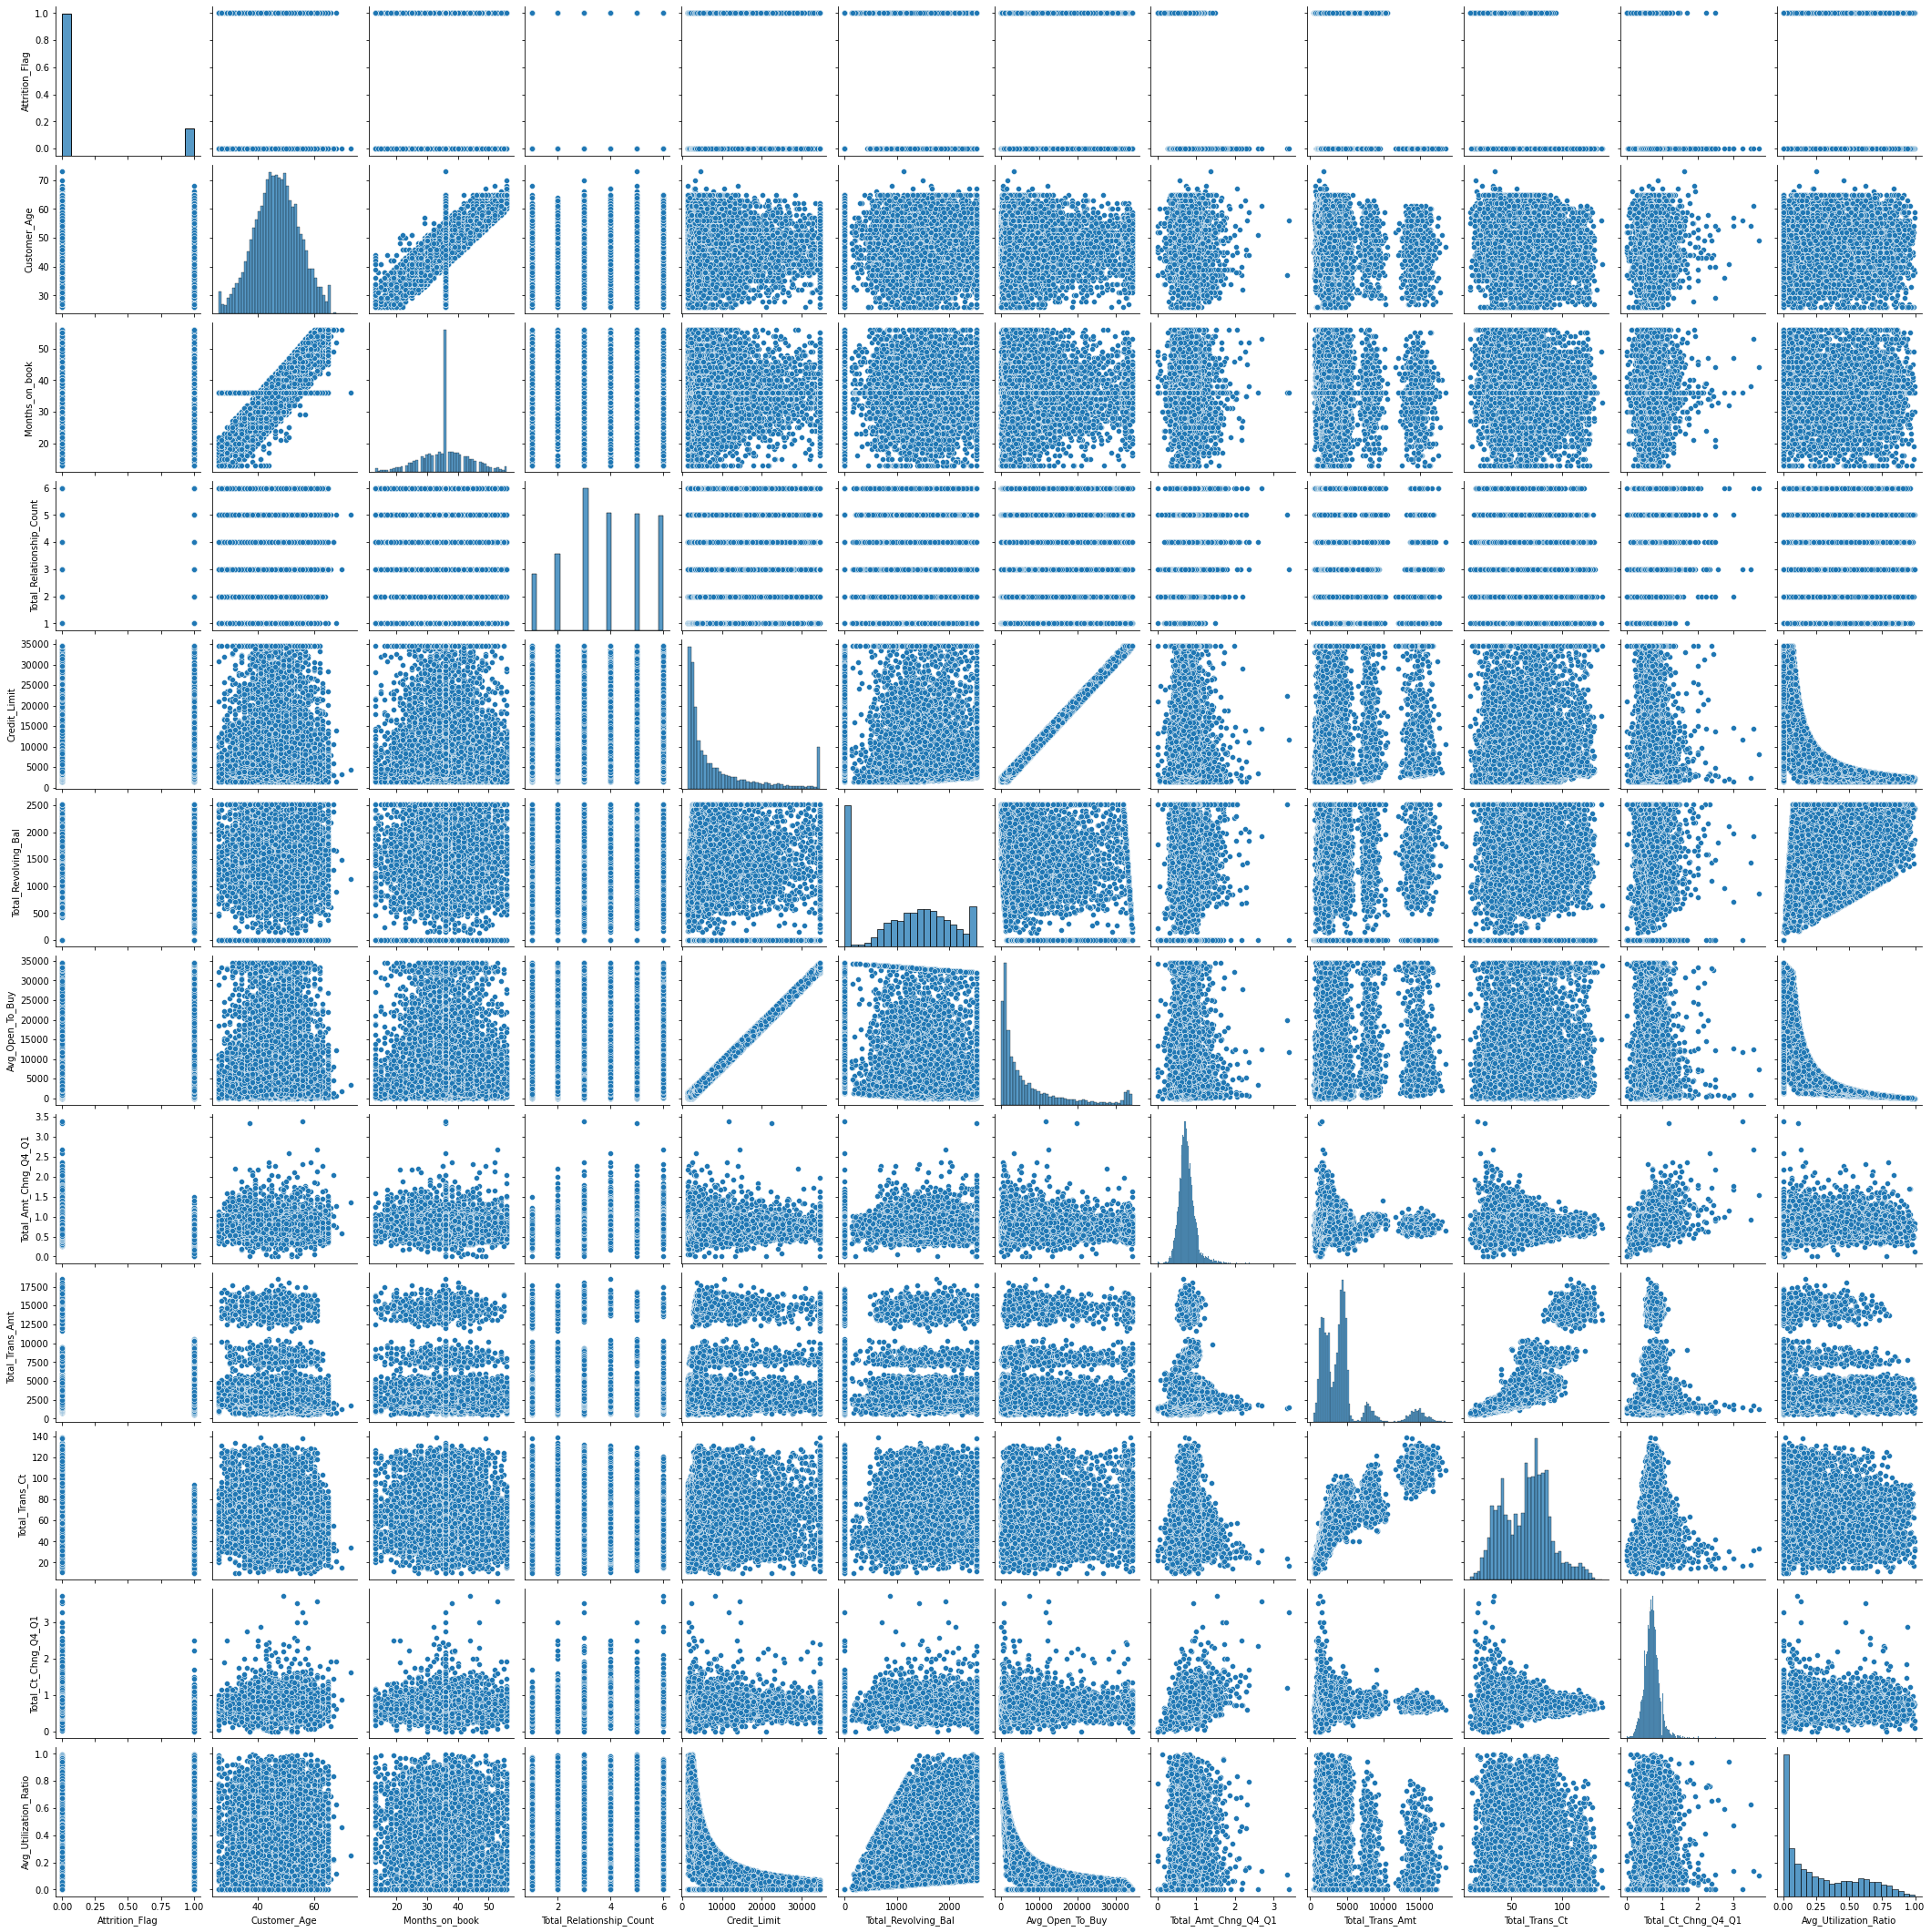

<IPython.core.display.Javascript object>

In [17]:
# I am using a pairplot to give a big picture on the relationships between the variables inside our dataset
sns.pairplot(data)

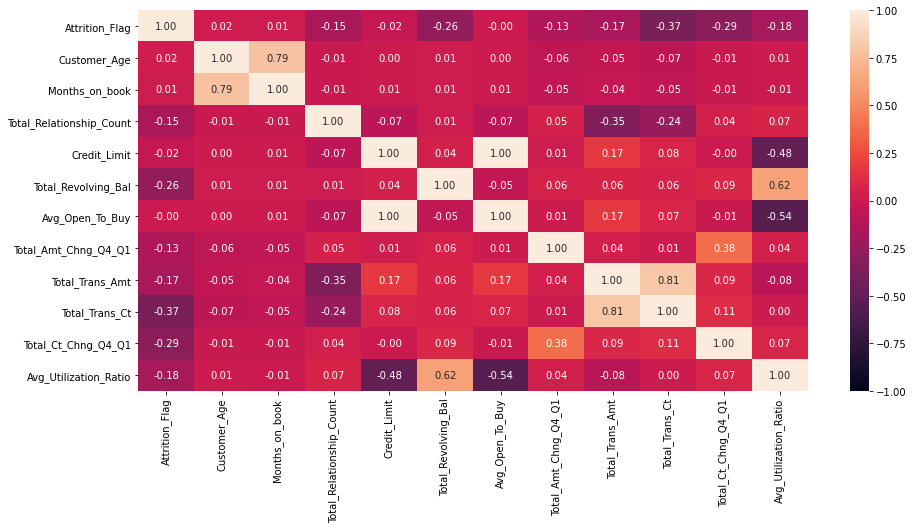

<IPython.core.display.Javascript object>

In [18]:
# Heatmap of variable correlation
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

#### Observations
I see strong correlation between:

Customer Age and Months On Book.

Total Revolving Bal and Avg Utilization Ratio.

Avg Open To Buy and Avg Utilization Ration.

Total Trans Amt and Total Trans Ct.

## EDA

In [19]:
# Defining a function to show percentage on bars for our countplots
def percent(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)
    plt.show()


# Defining a histogram function to show us outliers and boxplot, as well as median and mean vlines on the plot
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color="violet")
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color="green", linestyle="--")
    ax_hist2.axvline(np.median(feature), color="black", linestyle="-")

<IPython.core.display.Javascript object>

### Univariate Analysis

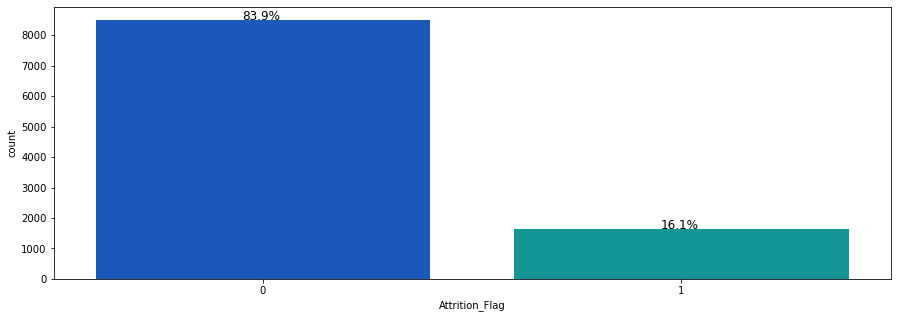

<IPython.core.display.Javascript object>

In [20]:
# Countplot of Attrition_Flag
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Attrition_Flag"], palette="winter")
percent(ax, data["Attrition_Flag"])

#### Observations
83.9% of the data are Existing Customers. 16.1% are Attrited Customers

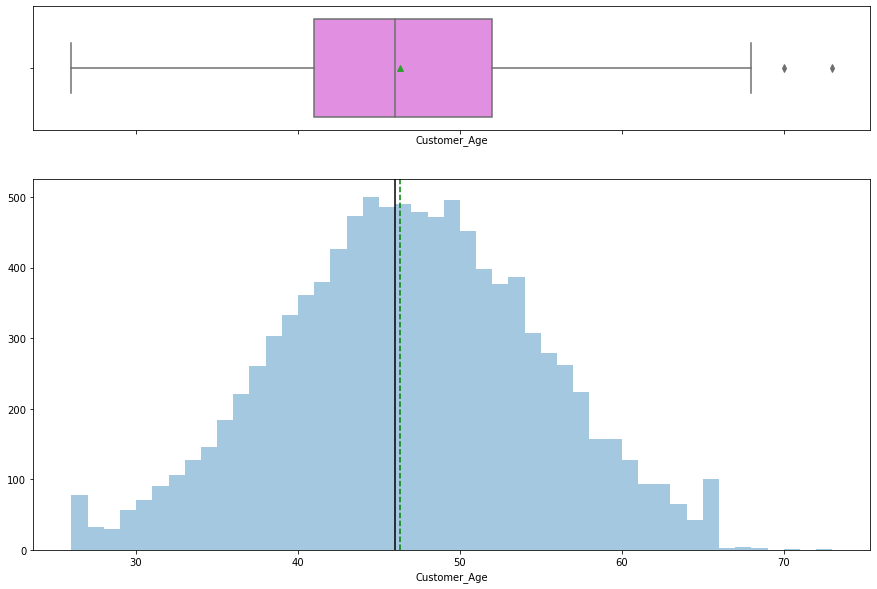

<IPython.core.display.Javascript object>

In [21]:
# Histogram showing Customer_Age
histogram_boxplot(data["Customer_Age"])

#### Observations
There are just a couple outliers.  The mean and Median are quite close. Sitting around 46.

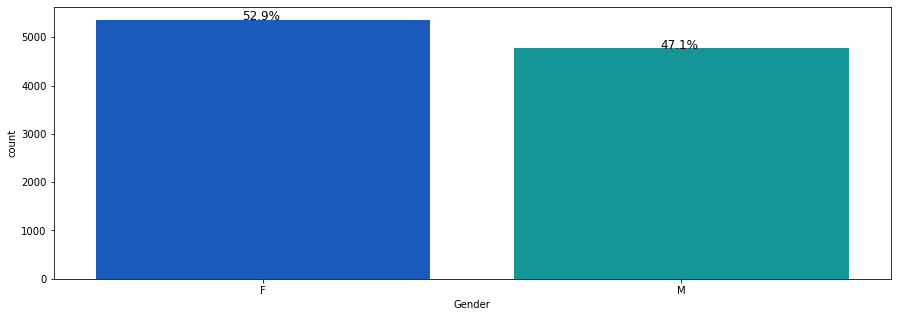

<IPython.core.display.Javascript object>

In [22]:
# Countplot of Gender
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Gender"], palette="winter")
percent(ax, data["Gender"])

#### Observations
Gender appears to be pretty much even.  It is close enough where it is not a concern.

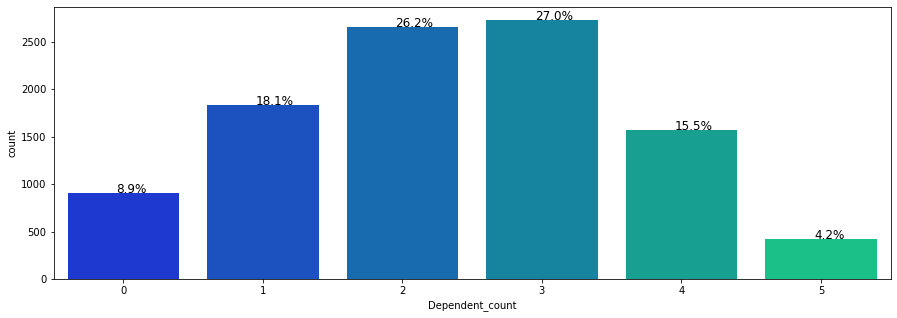

<IPython.core.display.Javascript object>

In [23]:
# Countplot of Dependent_count
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Dependent_count"], palette="winter")
percent(ax, data["Dependent_count"])

#### Observations
Dependent count is generally 2 or 3.  These two categories take up half the dataset.

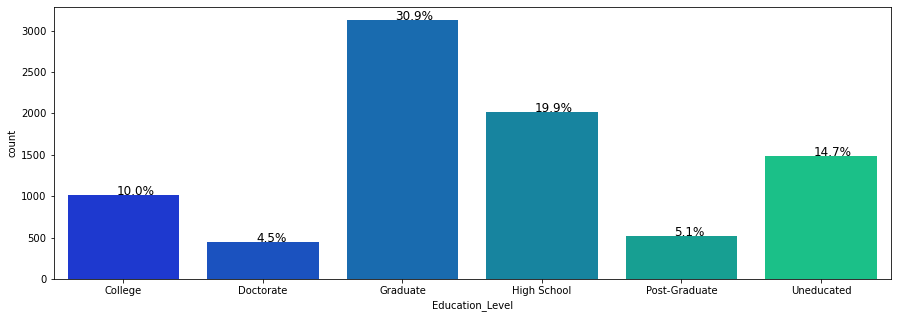

<IPython.core.display.Javascript object>

In [24]:
# Countplot of Education_Level
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Education_Level"], palette="winter")
percent(ax, data["Education_Level"])

#### Observations
Graduate and High School are the most common.  The dataset also has 14.7% Uneducated, however. About a third of the dataset are college graduates.

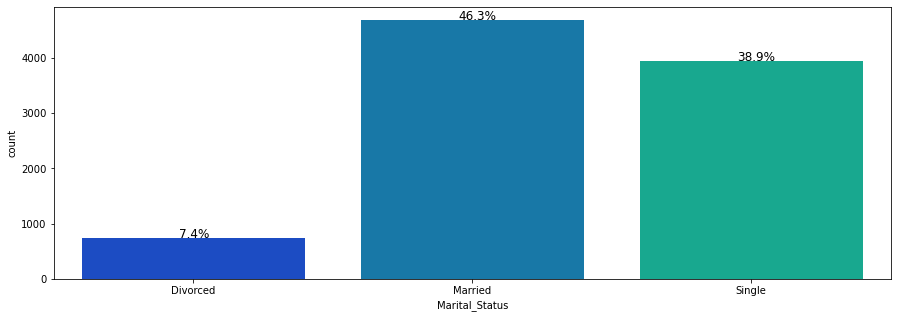

<IPython.core.display.Javascript object>

In [25]:
# Countplot of Marital_Status
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Marital_Status"], palette="winter")
percent(ax, data["Marital_Status"])

#### Observations
About half of the dataset is married, 38.9% are Single.

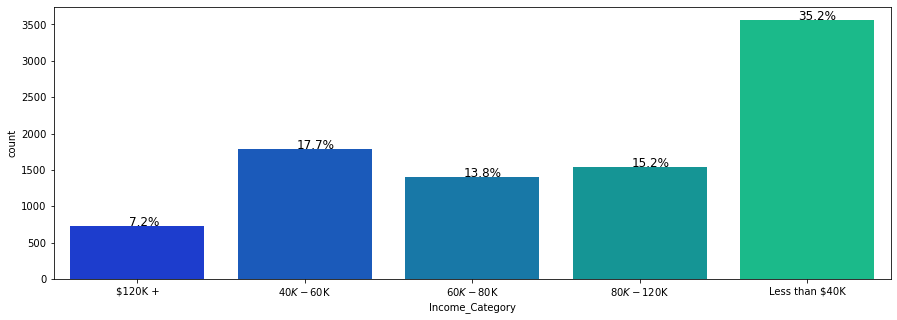

<IPython.core.display.Javascript object>

In [26]:
# Countplot of Income_Category
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Income_Category"], palette="winter")
percent(ax, data["Income_Category"])

#### Observations
There was the "abc" category that was removed from this variable.  35.2% of the dataset is under 40k.  This is substantial.  120k + is the rarest category, which isn't surprising.

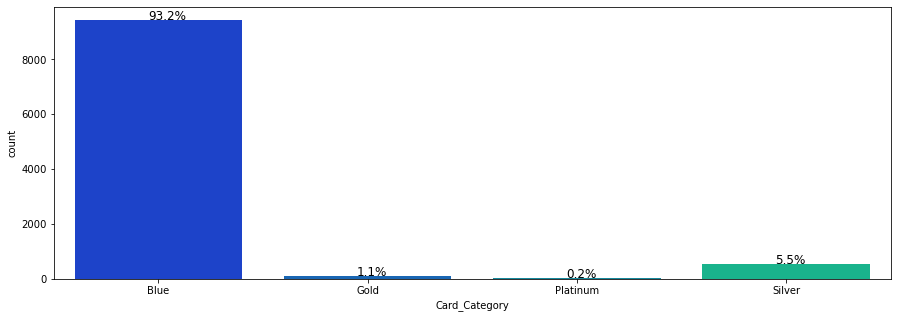

<IPython.core.display.Javascript object>

In [27]:
# Countplot of Card_Category
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Card_Category"], palette="winter")
percent(ax, data["Card_Category"])

#### Observations
An overwhelming majority of the dataset is the "Blue" card.

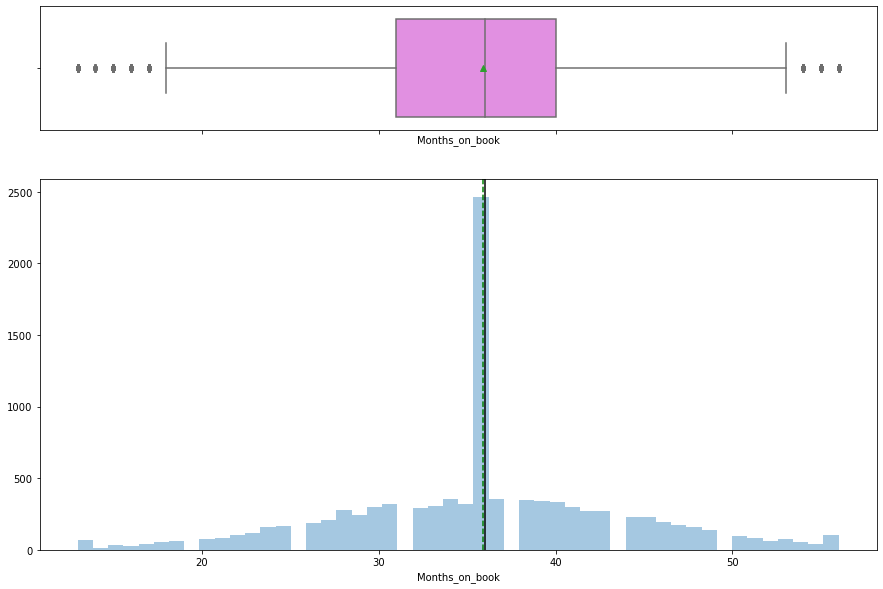

<IPython.core.display.Javascript object>

In [28]:
# Histogram showing Months_on_book
histogram_boxplot(data["Months_on_book"])

#### Observations
There appears to be a very large chunk of the data that put 36.  There are also some outliers on both ends.

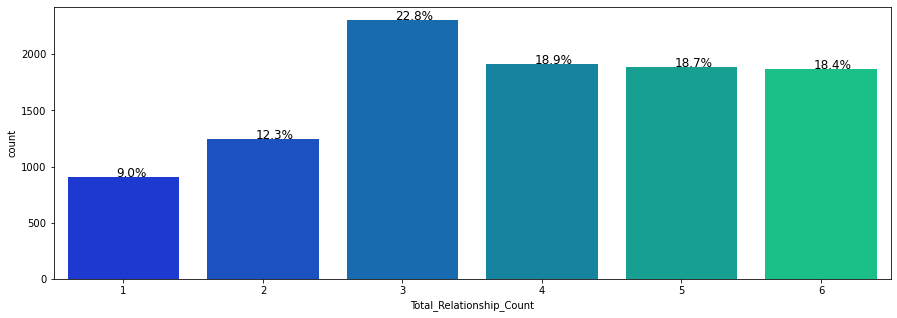

<IPython.core.display.Javascript object>

In [29]:
# Countplot of Total_Relationship_Count
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Total_Relationship_Count"], palette="winter")
percent(ax, data["Total_Relationship_Count"])

#### Observations
Total relationship count is reasonably dispersed amongst the categories.

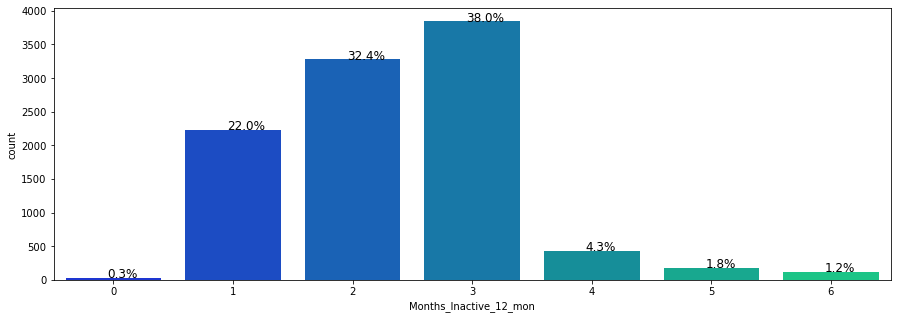

<IPython.core.display.Javascript object>

In [30]:
# Countplot of Months_Inactive_12_mon
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Months_Inactive_12_mon"], palette="winter")
percent(ax, data["Months_Inactive_12_mon"])

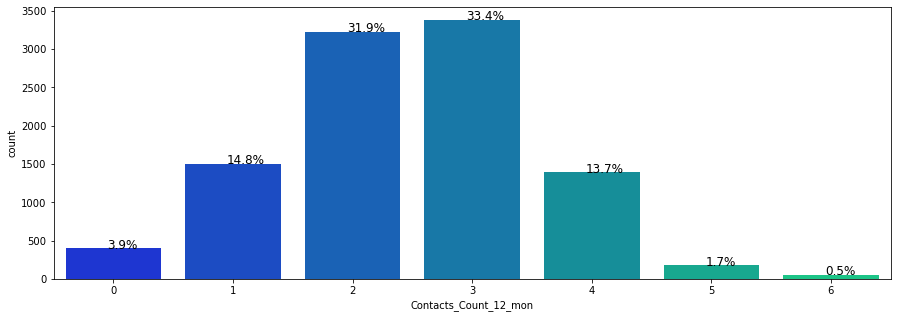

<IPython.core.display.Javascript object>

In [31]:
# Countplot of Contacts_Count_12_mon
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Contacts_Count_12_mon"], palette="winter")
percent(ax, data["Contacts_Count_12_mon"])

#### Observations
I saw correlation between Months_Inactive_12_mon and Contacts_Count_12_mon.  The distribution is similar amongst the two previous variables.

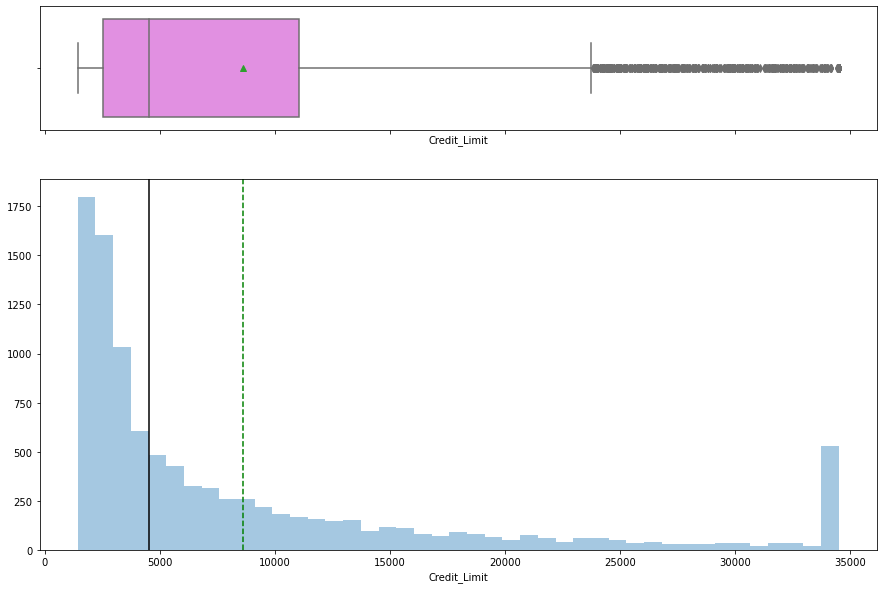

<IPython.core.display.Javascript object>

In [32]:
# Histogram showing Credit_Limit
histogram_boxplot(data["Credit_Limit"])

#### Observations
This variable is quite skewed. the mean is greater than the median indicating a positive skew.

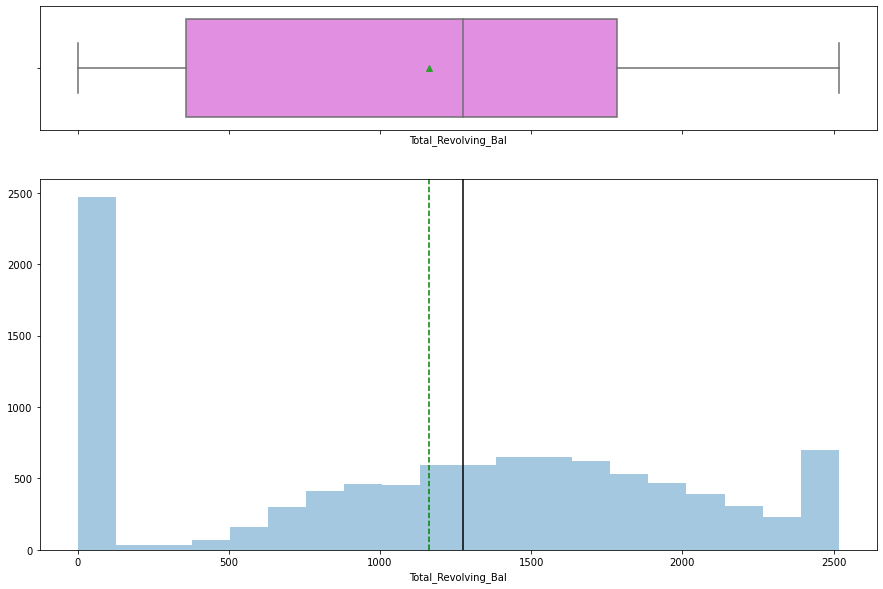

<IPython.core.display.Javascript object>

In [33]:
# Histogram showing Total_Revolving_Bal
histogram_boxplot(data["Total_Revolving_Bal"])

#### Observations
There are quite a few with 0.  The data is skewed to the left.

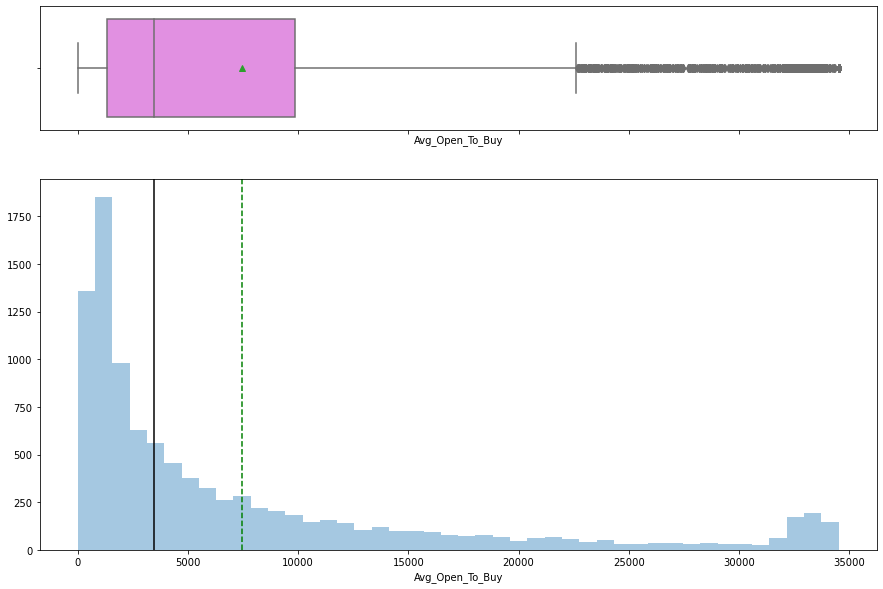

<IPython.core.display.Javascript object>

In [34]:
# Histogram showing Avg_Open_To_Buy
histogram_boxplot(data["Avg_Open_To_Buy"])

#### Observations
This variable is skewed substantially to the right.  There are quite a few outliers.

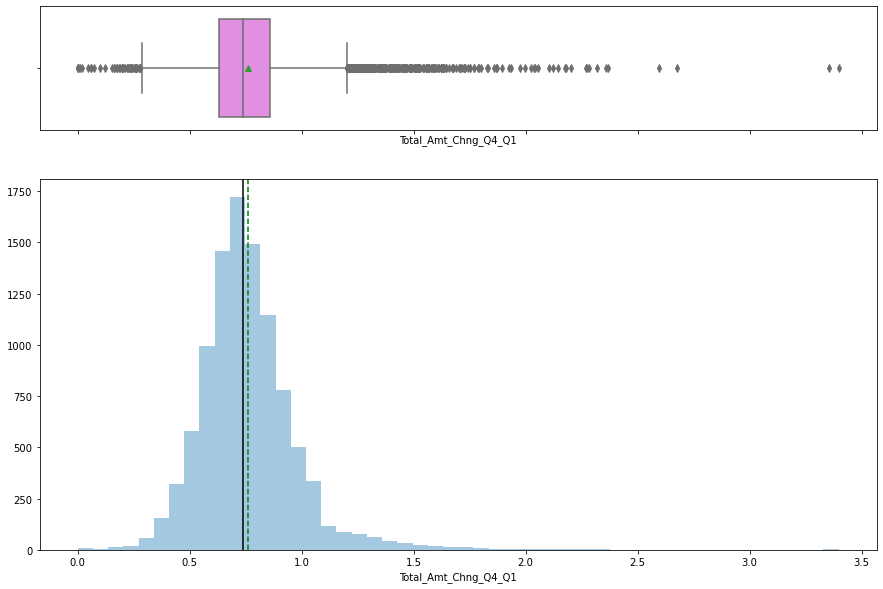

<IPython.core.display.Javascript object>

In [35]:
# Histogram showing Total_Amt_Chng_Q4_Q1
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

#### Observations
There are some outliers, but besides that, the data seems to be normally distributed.

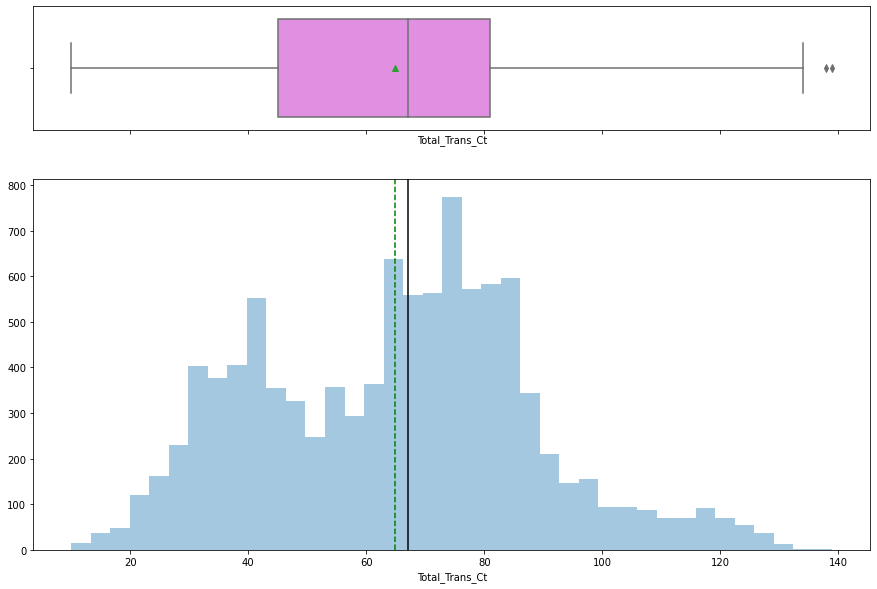

<IPython.core.display.Javascript object>

In [36]:
# Histogram showing Total_Trans_Ct
histogram_boxplot(data["Total_Trans_Ct"])

#### Observations
There are not any outliers, the data is slightly negatively skewed.

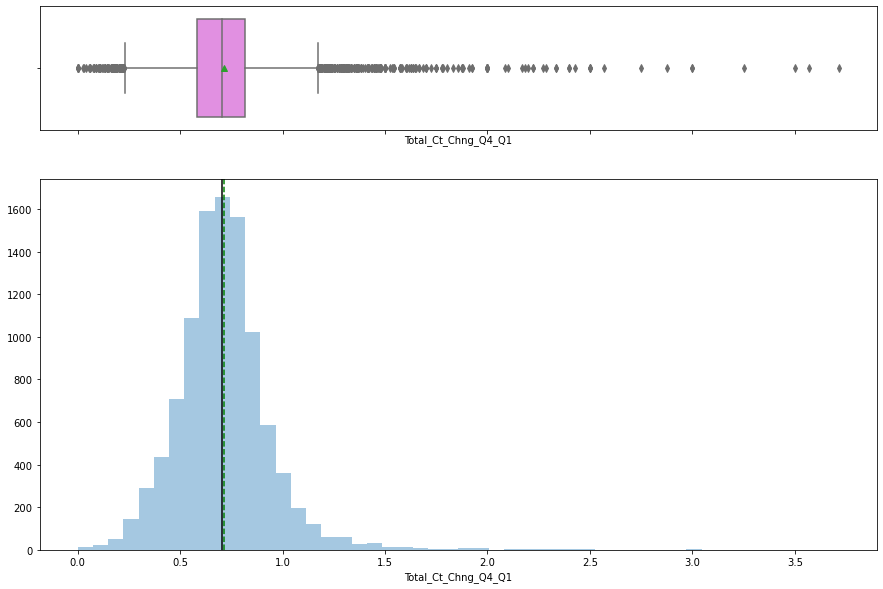

<IPython.core.display.Javascript object>

In [37]:
# Histogram showing Total_Ct_Chng_Q4_Q1
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

#### Observations
There are some outliers for this variable that need to be remedied.

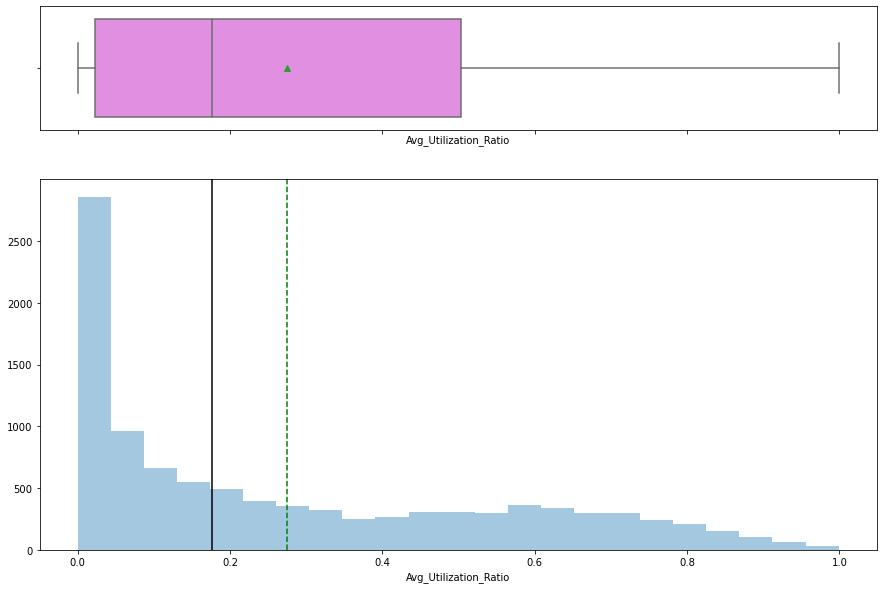

<IPython.core.display.Javascript object>

In [38]:
# Histogram showing Avg_Utilization_Ratio
histogram_boxplot(data["Avg_Utilization_Ratio"])

#### Observations
It looks like this variable is between 0 and 1.  It shows how much the user spent, so most of the data do not spend any, and rarely do they spend it all.

### Multivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

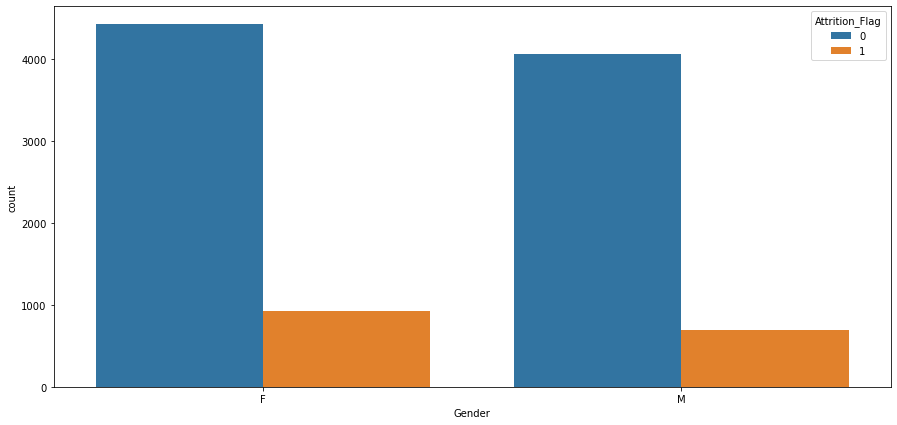

<IPython.core.display.Javascript object>

In [39]:
# Countplot showing Gender and Attrition_Flag
plt.figure(figsize=(15, 7))
sns.countplot(data["Gender"], hue=data["Attrition_Flag"])

#### Observations
It looks like Females are more likely to be an existing customer.  Males tend to churn more frequently.

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

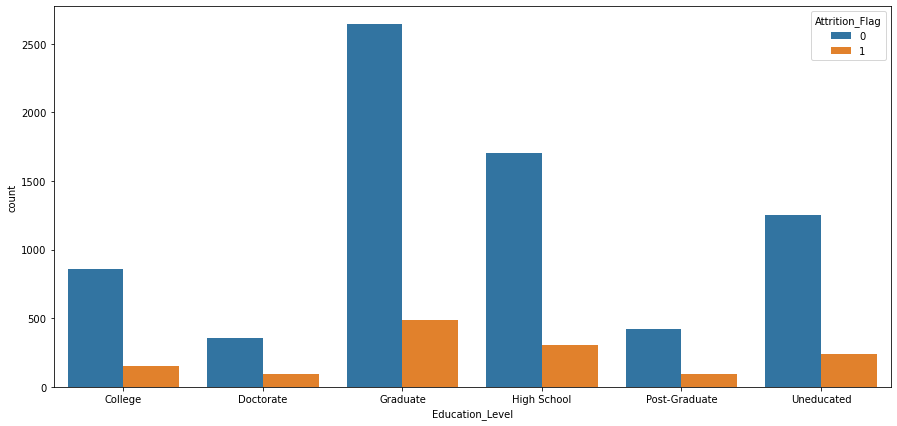

<IPython.core.display.Javascript object>

In [40]:
# Countplot showing Education_Level and Attrition_Flag
plt.figure(figsize=(15, 7))
sns.countplot(data["Education_Level"], hue=data["Attrition_Flag"])

#### Observations
Here I see the ratio of Education and Attrition_Flag.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

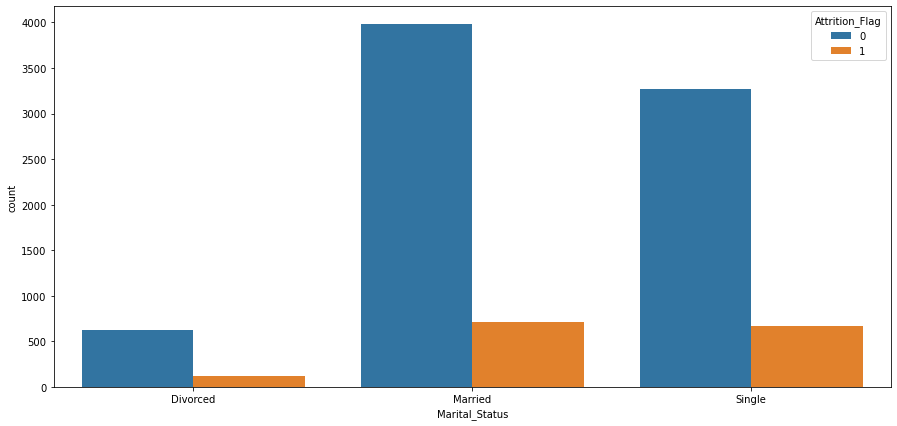

<IPython.core.display.Javascript object>

In [41]:
# Countplot showing Marital_Status and Attrition_Flag
plt.figure(figsize=(15, 7))
sns.countplot(data["Marital_Status"], hue=data["Attrition_Flag"])

#### Observations
Proportionally, Single tend to churn more frequently than married

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

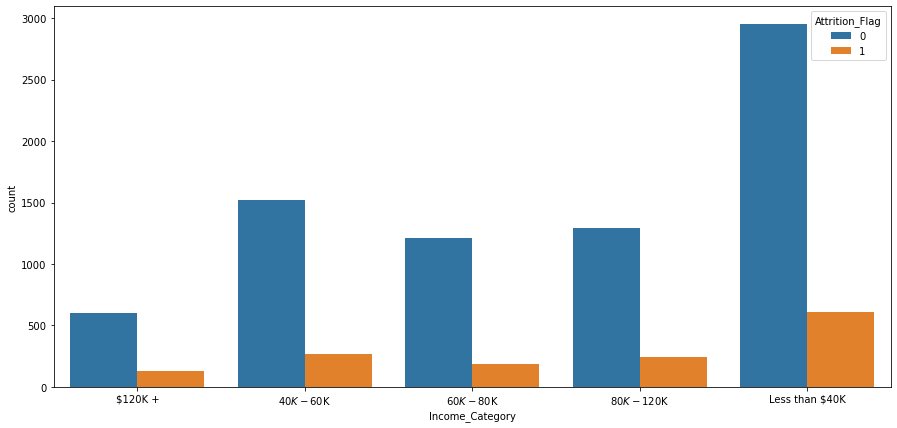

<IPython.core.display.Javascript object>

In [42]:
# Countplot showing Income_Category and Attrition_Flag
plt.figure(figsize=(15, 7))
sns.countplot(data["Income_Category"], hue=data["Attrition_Flag"])

#### Observations
Lowest income category is most likely to churn.

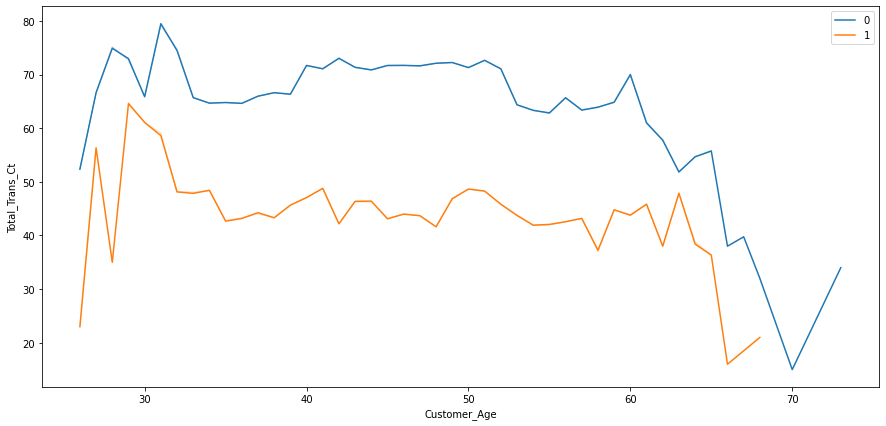

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 7))
sns.lineplot(
    data["Customer_Age"],
    data["Total_Trans_Ct"],
    hue=data["Attrition_Flag"],
    ci=0,
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations
It appears that Attrited Customers are making less transactions.  They also make less as they get older in general.  But there isn't a correlation with Age and churning, the trendlines follow the same path.

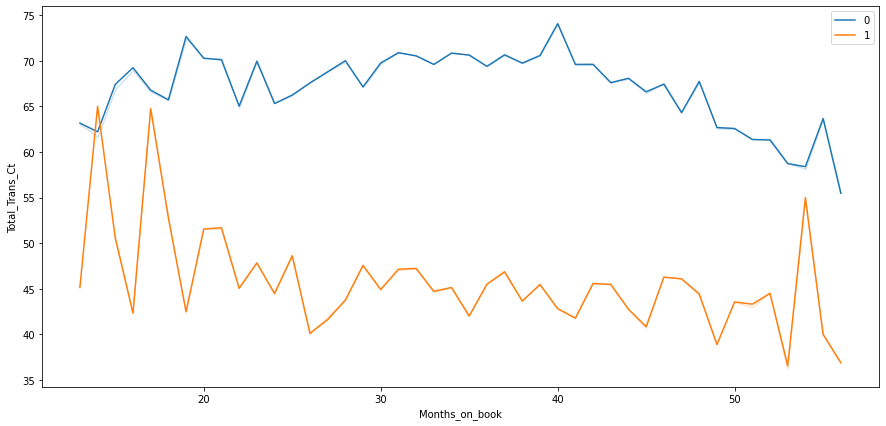

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(15, 7))
sns.lineplot(
    data["Months_on_book"],
    data["Total_Trans_Ct"],
    hue=data["Attrition_Flag"],
    ci=0,
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations
It appears that Attrited Customers are making less transactions the longer they are on the books.  Less transactions are made by those churned in general.

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

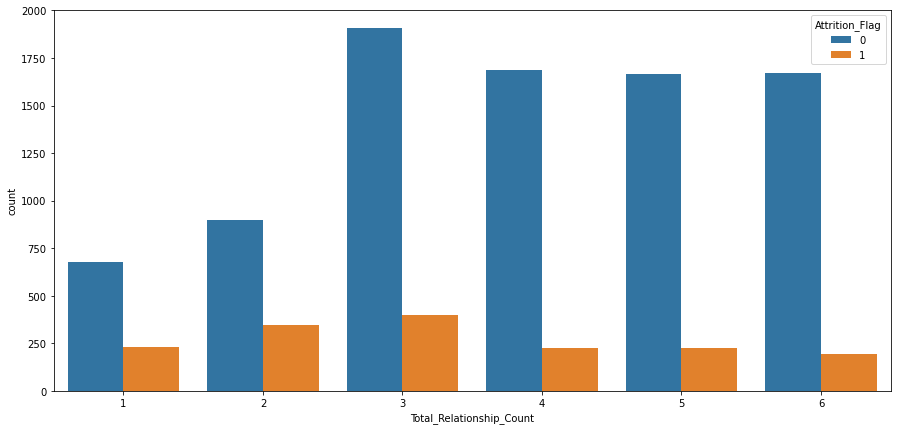

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(15, 7))
sns.countplot(data["Total_Relationship_Count"], hue=data["Attrition_Flag"])

#### Observations
The more relationships with the bank, the more likely they are to not churn.  Fewer relationships churn more frequently.

### Outlier Treatment

There are several variables where I am opting to not do outlier treatment on.  This is because they are plausible, and some of the outliers are important to help shape the data.  However, some are going to skew our model results; I will remove these now.

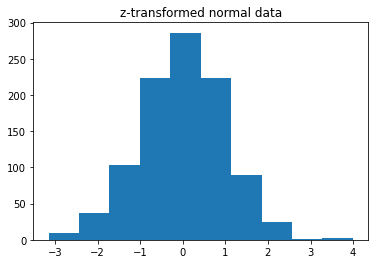

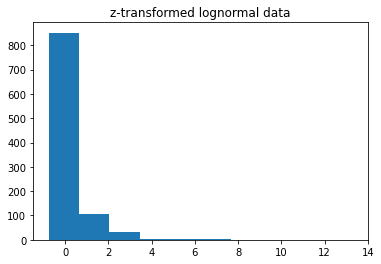

<IPython.core.display.Javascript object>

In [46]:
# Using Z-Transformation to flag outliers in our variables
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)


np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title("z-transformed normal data")
plt.show()


plt.hist(z_transform(x2))
plt.title("z-transformed lognormal data")
plt.show()

In [47]:
# Let's flag outliers for each of the variables
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [0.25, 0.75]))
    return np.mean(np.abs(x - np.median(x)) > length)


print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


<IPython.core.display.Javascript object>

In [48]:
# Outliers of Months_on_book
quartiles = np.quantile(
    data["Months_on_book"][data["Months_on_book"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers1 = data.loc[
    np.abs(data["Months_on_book"] - data["Months_on_book"].median()) > power_4iqr,
    "Months_on_book",
]
outlier_powers1

Q1 = 31.0, Q3 = 40.0, 4*IQR = 36.0


Series([], Name: Months_on_book, dtype: int64)

<IPython.core.display.Javascript object>

In [49]:
# Dropping outliers of Months_on_book
data.drop(outlier_powers1.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [50]:
# Outliers of Credit_Limit
quartiles = np.quantile(
    data["Credit_Limit"][data["Credit_Limit"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers2 = data.loc[
    np.abs(data["Credit_Limit"] - data["Credit_Limit"].median()) > power_4iqr,
    "Credit_Limit",
]
outlier_powers2

Q1 = 2555.0, Q3 = 11067.5, 4*IQR = 34050.0


Series([], Name: Credit_Limit, dtype: float64)

<IPython.core.display.Javascript object>

#### Observations
There are not any outliers flagged in this variable.

In [51]:
# Outliers of Total_Amt_Chng_Q4_Q1
quartiles = np.quantile(
    data["Total_Amt_Chng_Q4_Q1"][data["Total_Amt_Chng_Q4_Q1"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers3 = data.loc[
    np.abs(data["Total_Amt_Chng_Q4_Q1"] - data["Total_Amt_Chng_Q4_Q1"].median())
    > power_4iqr,
    "Total_Amt_Chng_Q4_Q1",
]
outlier_powers3

Q1 = 0.631, Q3 = 0.8590000000000001, 4*IQR = 0.9120000000000004


2       2.594
4       2.175
6       1.975
7       2.204
8       3.355
12      3.397
15      1.707
16      1.708
18      1.831
32      1.726
33      1.750
36      1.724
46      2.316
47      2.357
58      2.275
68      1.715
88      1.932
89      1.702
94      1.705
95      1.656
113     1.674
115     1.826
117     1.873
137     1.689
142     1.996
154     2.121
177     2.053
180     1.791
190     1.768
219     2.368
231     1.727
284     2.145
295     1.859
336     1.707
431     2.023
466     2.271
658     2.282
773     2.675
841     2.180
855     1.867
869     1.924
1085    2.041
1176    1.893
1219    2.103
1369    1.749
1455    1.787
1486    1.800
1570    1.676
1689    1.705
1718    1.769
1873    2.037
1883    1.669
2337    1.743
2565    1.731
3270    1.675
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

<IPython.core.display.Javascript object>

In [52]:
# Dropping outliers of Total_Amt_Chng_Q4_Q1
data.drop(outlier_powers3.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [53]:
# Outliers of Total_Ct_Chng_Q4_Q1
quartiles = np.quantile(
    data["Total_Ct_Chng_Q4_Q1"][data["Total_Ct_Chng_Q4_Q1"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers4 = data.loc[
    np.abs(data["Total_Ct_Chng_Q4_Q1"] - data["Total_Ct_Chng_Q4_Q1"].median())
    > power_4iqr,
    "Total_Ct_Chng_Q4_Q1",
]
outlier_powers4

Q1 = 0.581, Q3 = 0.816, 4*IQR = 0.94


1       3.714
3       2.333
13      2.000
30      2.571
52      1.923
69      2.000
76      1.875
84      2.000
91      2.182
131     2.200
146     2.875
151     1.909
158     2.429
162     2.167
167     2.286
239     2.273
269     3.500
280     2.400
281     1.667
294     2.083
300     2.000
309     2.100
322     1.750
323     1.875
324     1.875
346     1.833
366     2.750
418     1.778
456     2.000
697     1.857
757     2.222
760     1.778
805     2.500
1041    1.750
1095    2.222
1187    1.647
1256    2.000
1778    1.700
2099    1.722
2358    1.882
2510    2.500
2683    1.750
2696    1.923
4146    1.783
4597    1.650
9977    1.684
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

<IPython.core.display.Javascript object>

In [54]:
# Dropping outliers of Total_Amt_Chng_Q4_Q1
data.drop(outlier_powers4.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [55]:
# Outliers of Avg_Open_To_Buy
quartiles = np.quantile(
    data["Avg_Open_To_Buy"][data["Avg_Open_To_Buy"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers5 = data.loc[
    np.abs(data["Avg_Open_To_Buy"] - data["Avg_Open_To_Buy"].median()) > power_4iqr,
    "Avg_Open_To_Buy",
]
outlier_powers5

Q1 = 1330.25, Q3 = 9833.75, 4*IQR = 34014.0


Series([], Name: Avg_Open_To_Buy, dtype: float64)

<IPython.core.display.Javascript object>

#### Observations
There are not any outliers flagged in this variable.

In [56]:
# Outliers of Customer_Age
quartiles = np.quantile(
    data["Customer_Age"][data["Customer_Age"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers6 = data.loc[
    np.abs(data["Customer_Age"] - data["Customer_Age"].median()) > power_4iqr,
    "Customer_Age",
]
outlier_powers6

Q1 = 41.0, Q3 = 52.0, 4*IQR = 44.0


Series([], Name: Customer_Age, dtype: int64)

<IPython.core.display.Javascript object>

#### Observations
There are not any outliers flagged in this variable.

In [57]:
data.shape

(10026, 20)

<IPython.core.display.Javascript object>

#### Observations
Following my outlier treatment, there are 10026 entries remaining in the dataset.

### Scaling Variables

In [58]:
# Scaling a couple of variables using StandardScaler
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

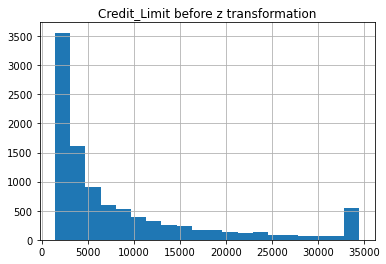

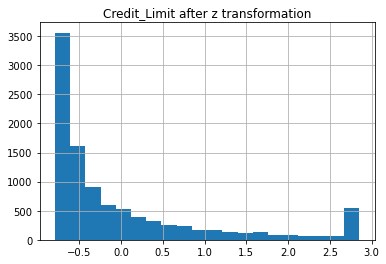

<IPython.core.display.Javascript object>

In [59]:
# Due to the large skew on the Credit_Limit variable, I am agoing to apply StandardScaler to replace the variable
std_scaler = StandardScaler()

data["Credit_Limit"].hist(bins=20)
plt.title("Credit_Limit before z transformation")
plt.show()

data["Credit_Limit_z_std"] = std_scaler.fit_transform(data[["Credit_Limit"]])
data["Credit_Limit_z_std"].hist(bins=20)
plt.title("Credit_Limit after z transformation")
plt.show()
data.drop(["Credit_Limit"], axis=1, inplace=True)

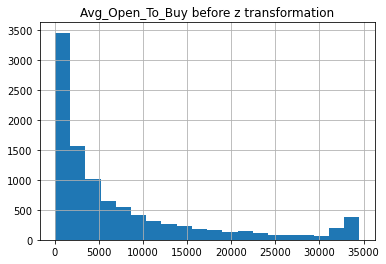

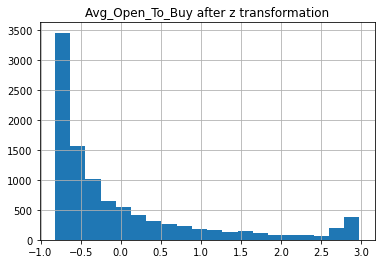

<IPython.core.display.Javascript object>

In [60]:
# Due to the large skew on the Avg_Open_To_Buy variable, I am agoing to apply StandardScaler to replace the variable
std_scaler = StandardScaler()

data["Avg_Open_To_Buy"].hist(bins=20)
plt.title("Avg_Open_To_Buy before z transformation")
plt.show()

data["Avg_Open_To_Buy_z_std"] = std_scaler.fit_transform(data[["Avg_Open_To_Buy"]])
data["Avg_Open_To_Buy_z_std"].hist(bins=20)
plt.title("Avg_Open_To_Buy after z transformation")
plt.show()
data.drop(["Avg_Open_To_Buy"], axis=1, inplace=True)

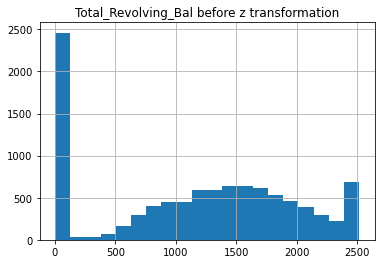

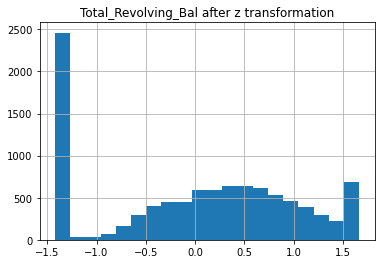

<IPython.core.display.Javascript object>

In [61]:
# Due to the large skew on the Total_Revolving_Bal variable, I am agoing to apply StandardScaler to replace the variable
std_scaler = StandardScaler()

data["Total_Revolving_Bal"].hist(bins=20)
plt.title("Total_Revolving_Bal before z transformation")
plt.show()

data["Total_Revolving_Bal_z_std"] = std_scaler.fit_transform(
    data[["Total_Revolving_Bal"]]
)
data["Total_Revolving_Bal_z_std"].hist(bins=20)
plt.title("Total_Revolving_Bal after z transformation")
plt.show()
data.drop(["Total_Revolving_Bal"], axis=1, inplace=True)

#### Observations
After applying StandardScaler, I should see better model results at the end.

## Model Building

I did feature engineering PRIOR to splitting the data to avoid data leakage.

In [62]:
# First, I always drop our target variable. In this instance, it is Attrition_Flag
X = data.drop(["Attrition_Flag"], axis=1)
Y = data["Attrition_Flag"]

# Building our dummies for categorical varaibles
X = pd.get_dummies(
    X,
    columns=[
        "Gender",
        "Dependent_count",
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
    ],
    drop_first=True,
)

# Now I am going to split into train, temporary, and test split
X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then I split into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6015, 43) (2005, 43) (2006, 43)


<IPython.core.display.Javascript object>

#### Observations
Out dataset is split into the ratio assigned. it's a 3:1:1 ratio between train, val, and test respectively.

In [63]:
# Now, I am going to do missing value treatment AFTER the split.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
impute = imputer.fit(X_train)

# Applying the imputer
X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

In [64]:
# Defining function to get my metrics for Accuracy, Recall and Precision in modeling
def get_metrics_score(model, flag=True):
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    if flag == True:
        print("Accuracy For Training Set: ", model.score(X_train, y_train))
        print("Accuracy For Test Set: ", model.score(X_test, y_test))
        print("Recall For Training Set: ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set: ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision For Training Set: ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision For Test Set: ", metrics.precision_score(y_test, pred_test))

    return score_list

<IPython.core.display.Javascript object>

In [65]:
# Confusion Matrix function
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [66]:
# Listing X columns, or features
feature_names = list(X.columns)
print(feature_names)

['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Credit_Limit_z_std', 'Avg_Open_To_Buy_z_std', 'Total_Revolving_Bal_z_std', 'Gender_M', 'Dependent_count_1', 'Dependent_count_2', 'Dependent_count_3', 'Dependent_count_4', 'Dependent_count_5', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Marital_Status_Married', 'Marital_Status_Single', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver', 'Months_Inactive_12_mon_1', 'Months_Inactive_12_mon_2', 'Months_Inactive_12_mon_3', 'Months_Inactive_12_mon_4', 'Months_Inactive_12_mon_5', 'Months_Inactive_12_mon_6', 'Contacts_Count_12_mon_1', 'Contacts_Count_12_mon_2', 'Contacts_C

<IPython.core.display.Javascript object>

In [67]:
# Fitting our decision tree model
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

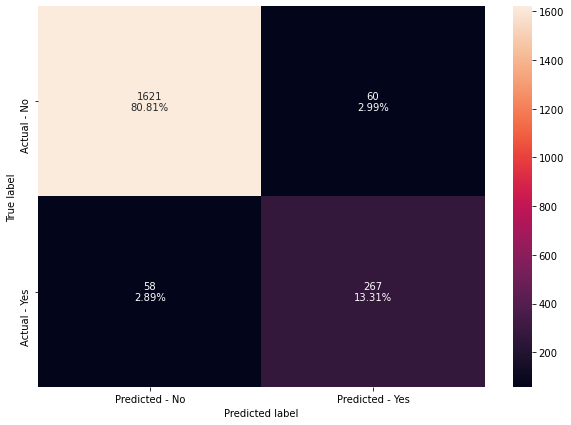

<IPython.core.display.Javascript object>

In [68]:
# Decision tree confusion matrix
make_confusion_matrix(dTree, y_test)

In [69]:
# Calculating recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

<IPython.core.display.Javascript object>

In [70]:
# Recall score for our decision tree
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8215384615384616


<IPython.core.display.Javascript object>

#### Observations
There is a test recall of .82, which isn't horrible. I can do better!

In [71]:
# Accuracy for our decision tree
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9411764705882353


<IPython.core.display.Javascript object>

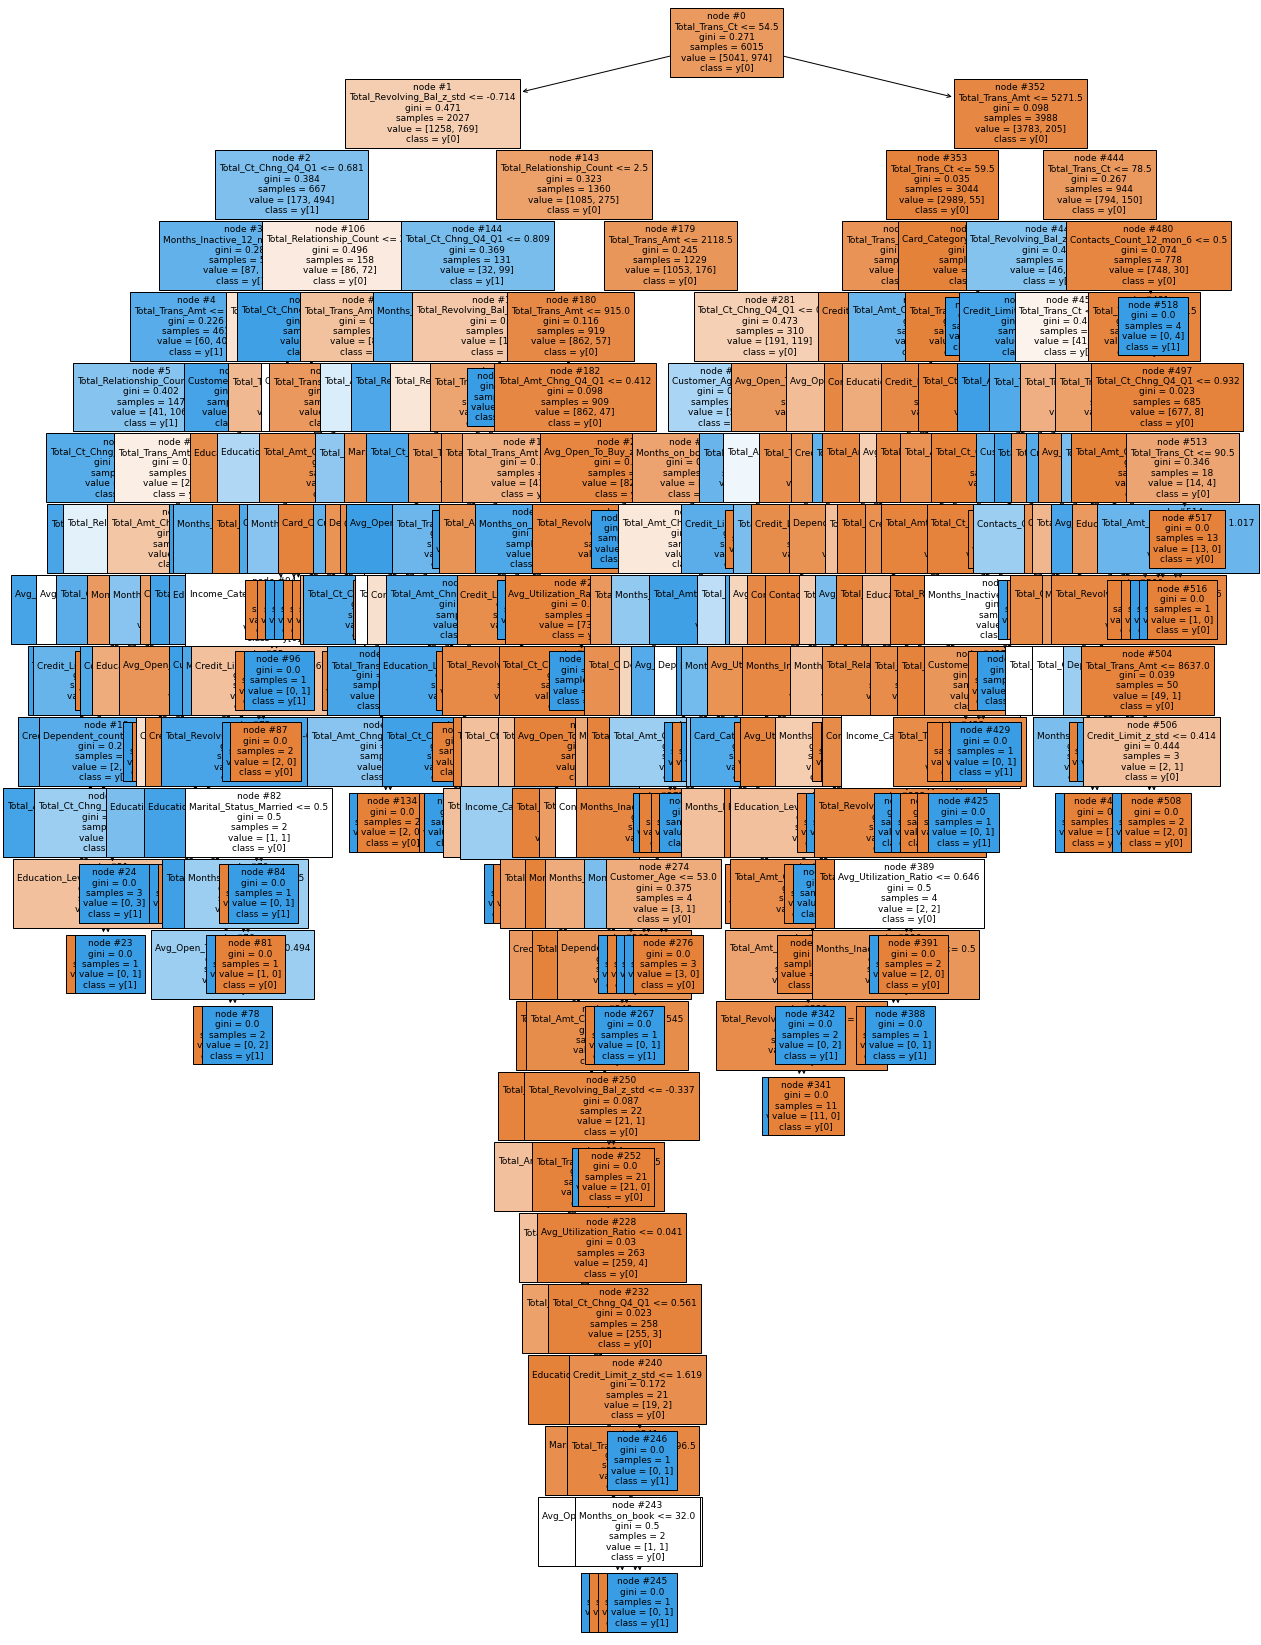

<IPython.core.display.Javascript object>

In [72]:
# Plotting our decision tree
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [73]:
# Text of decision tree
print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- Total_Trans_Ct <= 54.50
|   |--- Total_Revolving_Bal_z_std <= -0.71
|   |   |--- Total_Ct_Chng_Q4_Q1 <= 0.68
|   |   |   |--- Months_Inactive_12_mon_1 <= 0.50
|   |   |   |   |--- Total_Trans_Amt <= 1805.00
|   |   |   |   |   |--- Total_Relationship_Count <= 3.50
|   |   |   |   |   |   |--- Total_Ct_Chng_Q4_Q1 <= 0.57
|   |   |   |   |   |   |   |--- Total_Trans_Ct <= 44.50
|   |   |   |   |   |   |   |   |--- Avg_Open_To_Buy_z_std <= 0.78
|   |   |   |   |   |   |   |   |   |--- Total_Trans_Ct <= 36.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 44.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Total_Trans_Ct >  36.50
|   |   |   |   |   |   |   |   |   |   |--- Credit_Limit_z_std <= -0.11
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Credit_Limit_z_std >  -0.11
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Av

<IPython.core.display.Javascript object>

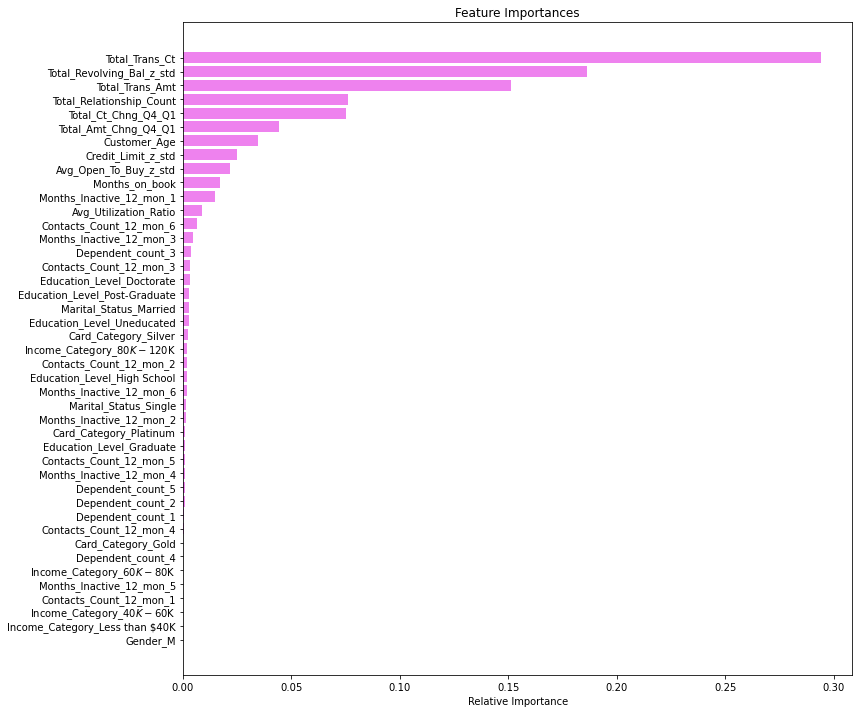

<IPython.core.display.Javascript object>

In [74]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
The most important variables  for churning, according to this model, are Total_Trans_Ct, Total_Revolving_Bal, and Total_Trans_Amt.

## Bagging And Random Forest

### Bagging 

In [75]:
# Bagging classifier base estimator
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [76]:
# Showing Accuracy, Recall and Precision from our bagging estimator variable
bagging_estimator_score = get_metrics_score(bagging_estimator)

Accuracy For Training Set:  0.9961762261014131
Accuracy For Test Set:  0.9571286141575274
Recall For Training Set:  0.9774127310061602
Recall on test set:  0.8215384615384616
Precision For Training Set:  0.9989506820566632
Precision For Test Set:  0.9050847457627119


<IPython.core.display.Javascript object>

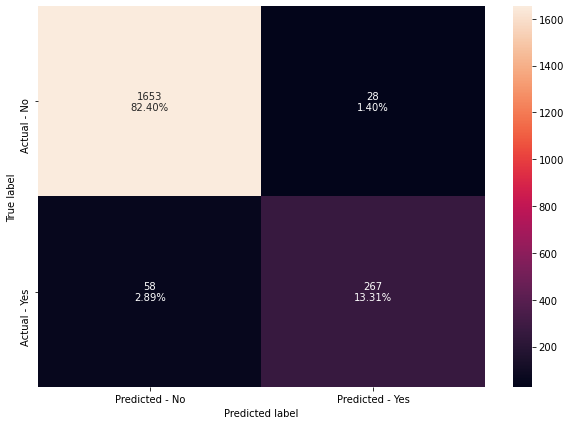

<IPython.core.display.Javascript object>

In [77]:
# Confusion matrix of bagging estimator
make_confusion_matrix(bagging_estimator, y_test)

#### Observations
This model actually performed quite well.  There isn't a lot a type I and II errors.  Precision and Accuracy are quite high on my test set.

### Random Forest

In [78]:
# Train the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [79]:
# Random Forest statistics: Accuracy, Recall, and Precision
rf_estimator_score = get_metrics_score(rf_estimator)

Accuracy For Training Set:  1.0
Accuracy For Test Set:  0.9536390827517448
Recall For Training Set:  1.0
Recall on test set:  0.7692307692307693
Precision For Training Set:  1.0
Precision For Test Set:  0.9328358208955224


<IPython.core.display.Javascript object>

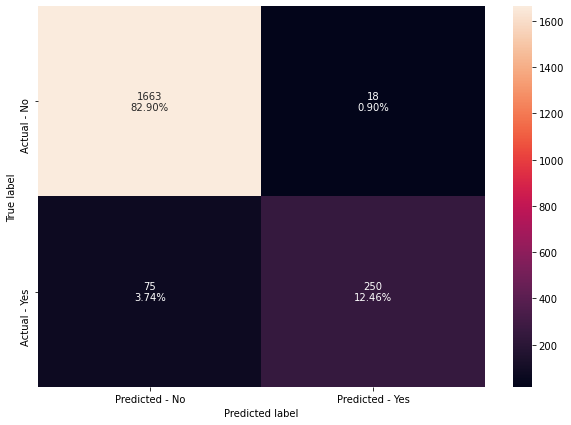

<IPython.core.display.Javascript object>

In [80]:
# Random Forest confusion matrix
make_confusion_matrix(rf_estimator, y_test)

#### Observations
The recall is 76, and the precision and accuracy are quite high.  It overfits slightly, however.

### Tuning our Bagging Classifier

In [81]:
# Tuning our BaggingClassifier
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# GridSearch
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=30,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Observations
Best parameters following this are:

max_features=0.9

max_samples=0.7

n_estimators=30

random_state=1)

In [82]:
# Tuned Bagging metrics
bagging_estimator_tuned_score = get_metrics_score(bagging_estimator_tuned)

Accuracy For Training Set:  0.9965087281795512
Accuracy For Test Set:  0.963110667996012
Recall For Training Set:  0.9794661190965093
Recall on test set:  0.8307692307692308
Precision For Training Set:  0.9989528795811519
Precision For Test Set:  0.9342560553633218


<IPython.core.display.Javascript object>

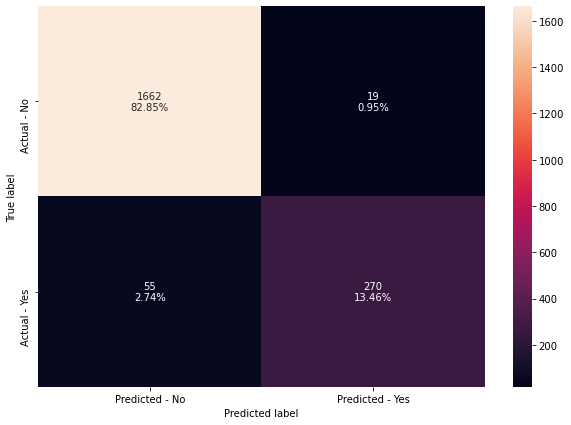

<IPython.core.display.Javascript object>

In [83]:
# Confusion matrix of tuned model
make_confusion_matrix(bagging_estimator_tuned, y_test)

#### Observations
Accuracy and precision are quite good on this model. Recall is an improvement from previous models.

In [84]:
bagging_lr = BaggingClassifier(
    base_estimator=LogisticRegression(solver="liblinear", random_state=1),
    random_state=1,
)
bagging_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

<IPython.core.display.Javascript object>

In [85]:
# Using our new function to get our metrics
bagging_lr_score = get_metrics_score(bagging_lr)

Accuracy For Training Set:  0.9050706566916044
Accuracy For Test Set:  0.9062811565304087
Recall For Training Set:  0.5636550308008214
Recall on test set:  0.5723076923076923
Precision For Training Set:  0.7899280575539568
Precision For Test Set:  0.7914893617021277


<IPython.core.display.Javascript object>

#### Observations
This model does not perform well across the board compared to past models. The recall is quite poor.

## Boosting

### Adaboost

In [86]:
# Boosting Adaboost
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [87]:
# Using our function to get metrics for the set
abc_score = get_metrics_score(abc)

Accuracy For Training Set:  0.9619285120532003
Accuracy For Test Set:  0.9541375872382851
Recall For Training Set:  0.8552361396303901
Recall on test set:  0.8276923076923077
Precision For Training Set:  0.9044516829533116
Precision For Test Set:  0.8819672131147541


<IPython.core.display.Javascript object>

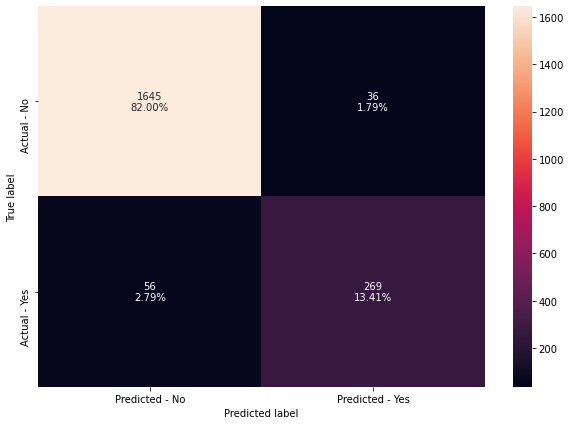

<IPython.core.display.Javascript object>

In [88]:
# Adaboost Confusion Matrix
make_confusion_matrix(abc, y_test)

#### Observations
The adaboost model does a good job as well compared to past models.  The model overfits though.

### Gradient Boost

In [89]:
# Boosting Gradient Boost
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [90]:
# Using our function to get metrics for the set
gbc_score = get_metrics_score(gbc)

Accuracy For Training Set:  0.9743973399833749
Accuracy For Test Set:  0.9690927218344965
Recall For Training Set:  0.8839835728952772
Recall on test set:  0.8584615384615385
Precision For Training Set:  0.9545454545454546
Precision For Test Set:  0.9457627118644067


<IPython.core.display.Javascript object>

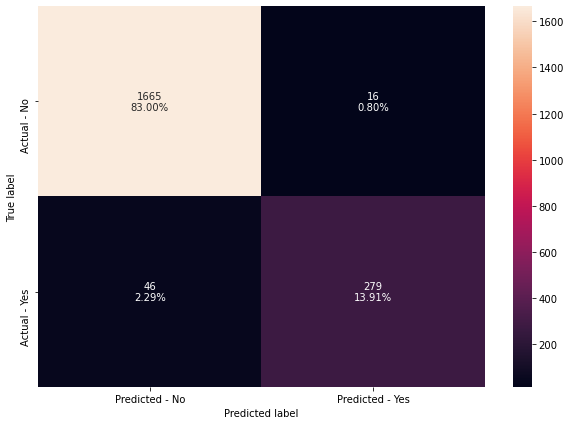

<IPython.core.display.Javascript object>

In [91]:
# Gradient Boost Confusion Matrix
make_confusion_matrix(gbc, y_test)

#### Observations
The gradient boost model performs amazingly well, with some overfitting.

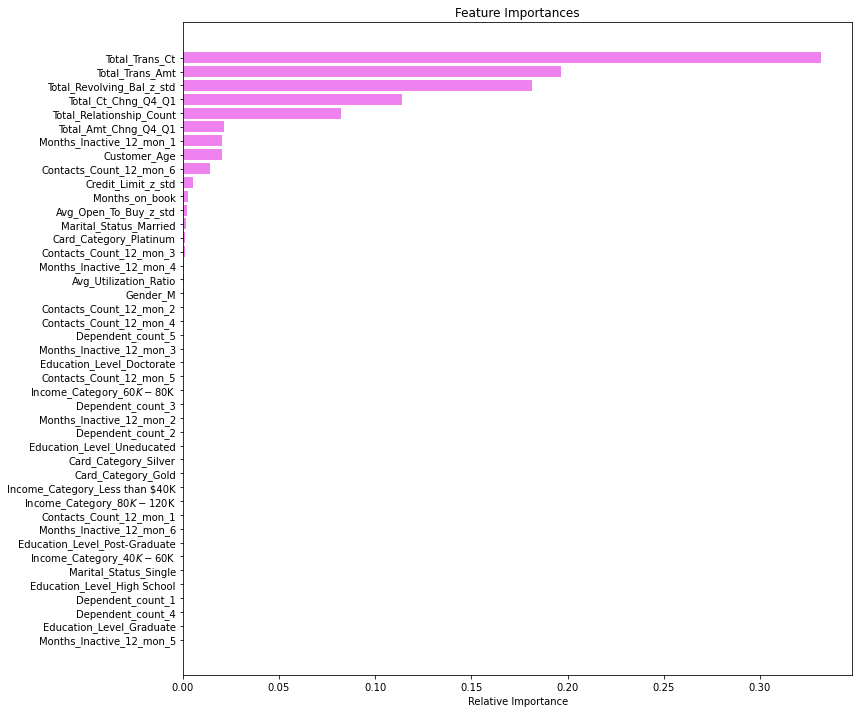

<IPython.core.display.Javascript object>

In [92]:
# Listing the feature importances in order for this model
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
The most important variables  for churning, according to this model, are Total_Trans_Ct, Total_Revolving_Bal, and Total_Trans_Amt. It is the same as our dTree model from earlier.

In [93]:
# defining list of models
models1 = [
    bagging_estimator,
    bagging_estimator_tuned,
    bagging_lr,
    rf_estimator,
    abc,
    gbc,
]


acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in models1:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

<IPython.core.display.Javascript object>

In [94]:
# Making comparison frame to compare my metrics from the past 6 models
comparison_frame1 = pd.DataFrame(
    {
        "Model": [
            "Default Bagging Classifier:",
            "Tuned Bagging Classifier:",
            "Bagging Classifier LR:",
            "Default Random Forest:",
            "AdaBoost:",
            "Gradient Boosting:",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)
comparison_frame1

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  Default Bagging Classifier:            1.00           0.96          0.98   
1    Tuned Bagging Classifier:            1.00           0.96          0.98   
2       Bagging Classifier LR:            0.91           0.91          0.56   
3       Default Random Forest:            1.00           0.95          1.00   
4                    AdaBoost:            0.96           0.95          0.86   
5           Gradient Boosting:            0.97           0.97          0.88   

   Test_Recall  Train_Precision  Test_Precision  
0         0.82             1.00            0.91  
1         0.83             1.00            0.93  
2         0.57             0.79            0.79  
3         0.77             1.00            0.93  
4         0.83             0.90            0.88  
5         0.86             0.95            0.95

<IPython.core.display.Javascript object>

#### Observations
Out of the 6 models I had just made, the 2 boosted models and the Tuned Bagging model are the best 3.  All of these models are sufficient, but I think I can do better.

### Model Building: Oversampled Data

Now I am going to do Oversampled model building. This is creating fake entries in the dataset.  It is affecting the weight of the variables.  Let's oversample!

In [95]:
# First, as always, I drop the target variable Attrition_Flag
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [96]:
# Splitting into training, test, and temporary sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Splitting into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6015, 19) (2005, 19) (2006, 19)


<IPython.core.display.Javascript object>

In [97]:
# Creating my dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6015, 43) (2005, 43) (2006, 43)


<IPython.core.display.Javascript object>

#### Observations
The data is split in a 3:1:1 ratio for train, validation, and test sets.

In [98]:
# Function to check metrics
def model_performance_classification_sklearn(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [99]:
# Function for Confusion Matrix
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [100]:
# I am using SMOTE for oversampled model building, creating synthetic samples

print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 974
Before UpSampling, counts of label 'No': 5041 

After UpSampling, counts of label 'Yes': 5041
After UpSampling, counts of label 'No': 5041 

After UpSampling, the shape of train_X: (10082, 43)
After UpSampling, the shape of train_y: (10082,) 



<IPython.core.display.Javascript object>

#### Observations
An increase in "Yes" after upsampling should be noted.

In [101]:
# Logistic Regression Oversampled model
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

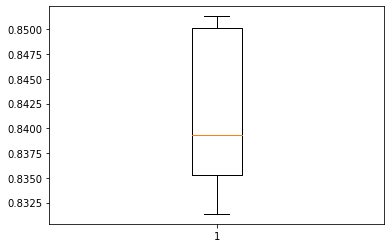

<IPython.core.display.Javascript object>

In [102]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [103]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.871454  0.850427   0.887761  0.868693

<IPython.core.display.Javascript object>

In [104]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


Accuracy    Recall  Precision        F1
0   0.84788  0.612308   0.526455  0.566145

<IPython.core.display.Javascript object>

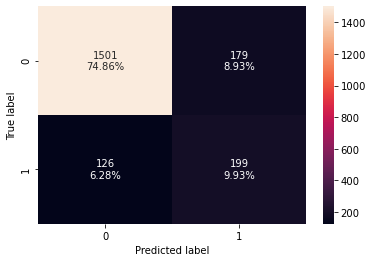

<IPython.core.display.Javascript object>

In [105]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

#### Observations
The validation set performs quite worse than training, as expected.  

In [106]:
# Logistic Regression Estimator Oversampled
lr_estimator_over = LogisticRegression(random_state=1, solver="saga")

parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# GridSearch
grid_obj = GridSearchCV(lr_estimator_over, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

lr_estimator_over = grid_obj.best_estimator_

# Fitting my model
lr_estimator_over.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

<IPython.core.display.Javascript object>

In [107]:
# Train Set metrics
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.731006  0.674866   0.760223  0.715006

<IPython.core.display.Javascript object>

In [108]:
# Calculating different metrics on validation set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator_over, X_val, y_val
)
print("Validation performance:")
log_reg_reg_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.781546  0.683077   0.398564  0.503401

<IPython.core.display.Javascript object>

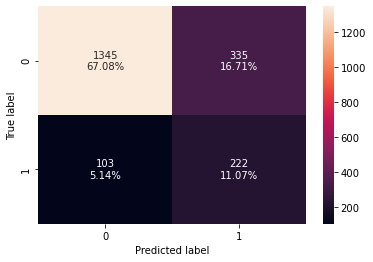

<IPython.core.display.Javascript object>

In [109]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator_over, X_val, y_val)

#### Observations
The LR Estimator model is worse.

In [110]:
# Oversampled Tree

# Fitting our decision tree
dTree_over = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

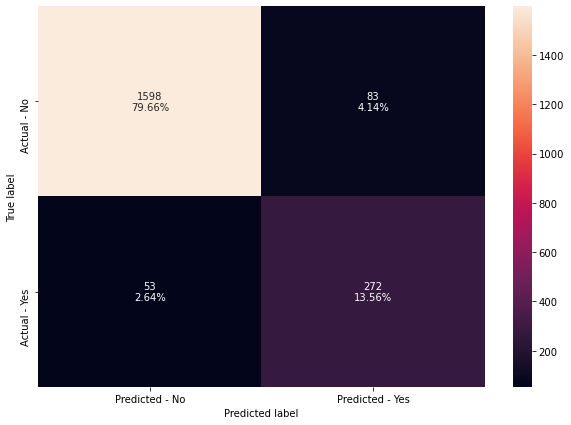

<IPython.core.display.Javascript object>

In [111]:
# Decision tree confusion matrix oversampled
make_confusion_matrix(dTree_over, y_test)

In [112]:
# Calculating recall score
def get_recall_score(model):
    pred_train = model.predict(X_train_over)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train_over, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

<IPython.core.display.Javascript object>

In [113]:
# Recall score for our decision tree
get_recall_score(dTree_over)

Recall on training set :  1.0
Recall on test set :  0.8369230769230769


<IPython.core.display.Javascript object>

In [114]:
# Accuracy for our decision tree
print("Accuracy on training set : ", dTree_over.score(X_train_over, y_train_over))
print("Accuracy on test set : ", dTree_over.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9322033898305084


<IPython.core.display.Javascript object>

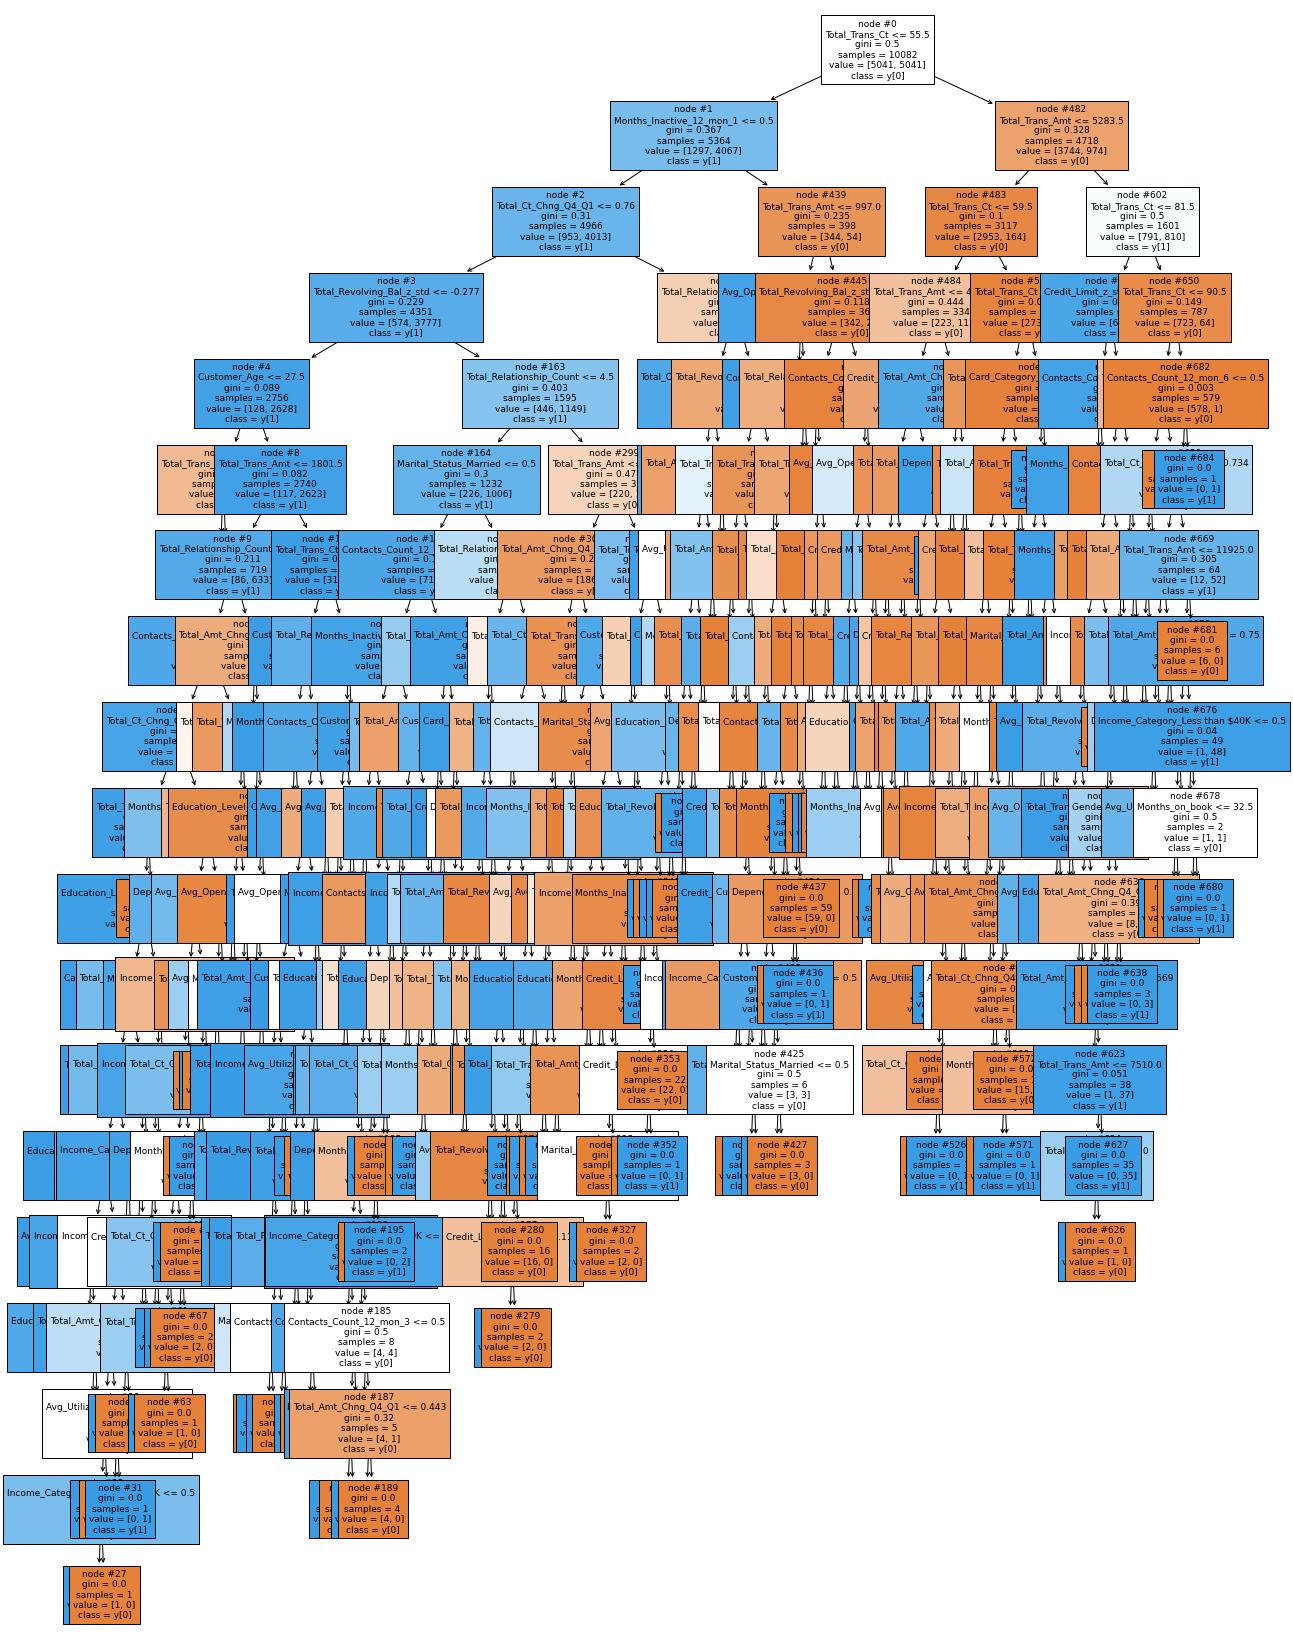

<IPython.core.display.Javascript object>

In [115]:
# Plotting our decision tree
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree_over,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [116]:
# Text of decision tree
print(tree.export_text(dTree_over, feature_names=feature_names, show_weights=True))

|--- Total_Trans_Ct <= 55.50
|   |--- Months_Inactive_12_mon_1 <= 0.50
|   |   |--- Total_Ct_Chng_Q4_Q1 <= 0.76
|   |   |   |--- Total_Revolving_Bal_z_std <= -0.28
|   |   |   |   |--- Customer_Age <= 27.50
|   |   |   |   |   |--- Total_Trans_Amt <= 1403.00
|   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |--- Total_Trans_Amt >  1403.00
|   |   |   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |   |--- Customer_Age >  27.50
|   |   |   |   |   |--- Total_Trans_Amt <= 1801.50
|   |   |   |   |   |   |--- Total_Relationship_Count <= 5.50
|   |   |   |   |   |   |   |--- Contacts_Count_12_mon_2 <= 0.50
|   |   |   |   |   |   |   |   |--- Total_Ct_Chng_Q4_Q1 <= 0.59
|   |   |   |   |   |   |   |   |   |--- Total_Trans_Ct <= 50.00
|   |   |   |   |   |   |   |   |   |   |--- Education_Level_Uneducated <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- Education_Leve

<IPython.core.display.Javascript object>

#### Observations
Oversampled dTree is a good model. dTrees tend to overfit, but the metrics are good.

### Bagging Oversampled

In [117]:
# Bagging classifier base estimator
bagging_estimator_over = BaggingClassifier(random_state=1)
bagging_estimator_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [118]:
# Showing Accuracy, Recall and Precision from our bagging estimator variable
bagging_estimator_score_over = get_metrics_score(bagging_estimator_over)

Accuracy For Training Set:  0.998171238570241
Accuracy For Test Set:  0.9511465603190429
Recall For Training Set:  0.9928131416837782
Recall on test set:  0.8461538461538461
Precision For Training Set:  0.995880535530381
Precision For Test Set:  0.8513931888544891


<IPython.core.display.Javascript object>

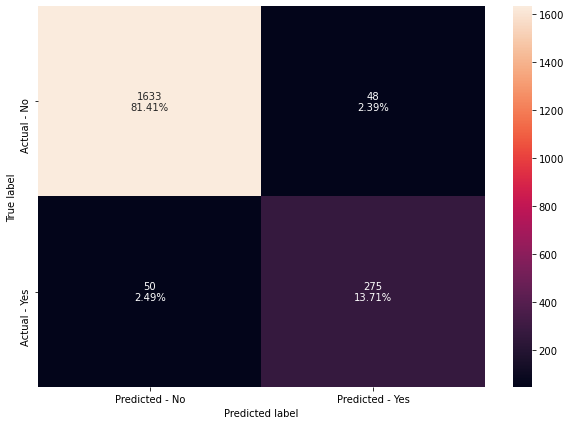

<IPython.core.display.Javascript object>

In [119]:
# Confusion matrix of bagging estimator
make_confusion_matrix(bagging_estimator_over, y_test)

#### Obesrvations
This model performs exceptionally well on accuracy and recall. Precision is quite high as well

### Random Forest Oversampled

In [120]:
# Train the random forest classifier
rf_estimator_over = RandomForestClassifier(random_state=1)
rf_estimator_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [121]:
# Random Forest statistics: Accuracy, Recall, and Precision
rf_estimator_score_over = get_metrics_score(rf_estimator_over)

Accuracy For Training Set:  1.0
Accuracy For Test Set:  0.9516450648055832
Recall For Training Set:  1.0
Recall on test set:  0.8153846153846154
Precision For Training Set:  1.0
Precision For Test Set:  0.8774834437086093


<IPython.core.display.Javascript object>

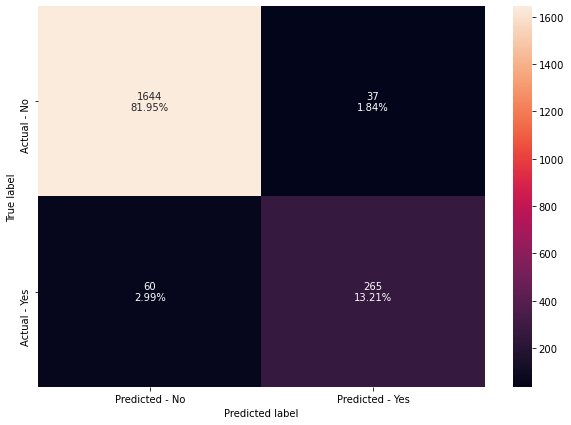

<IPython.core.display.Javascript object>

In [122]:
# Random Forest confusion matrix
make_confusion_matrix(rf_estimator_over, y_test)

#### Observations
Random Forest model has some Type I and II errors.  The good thing about this model is that the precision is higher, though.

### Bagging Oversampled

In [123]:
# Bagging Classifier Oversampled
bagging_estimator_over = BaggingClassifier(random_state=1)

parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# GridSearch
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_over = grid_obj.best_estimator_

bagging_estimator_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=30,
                  random_state=1)

<IPython.core.display.Javascript object>

In [124]:
# Tuned Bagging Oversampled metrics
bagging_estimator_tuned_score = get_metrics_score(bagging_estimator_over)

Accuracy For Training Set:  0.9980049875311721
Accuracy For Test Set:  0.9536390827517448
Recall For Training Set:  0.9958932238193019
Recall on test set:  0.88
Precision For Training Set:  0.9918200408997955
Precision For Test Set:  0.8411764705882353


<IPython.core.display.Javascript object>

In [125]:
bagging_lr_over = BaggingClassifier(
    base_estimator=LogisticRegression(solver="liblinear", random_state=1),
    random_state=1,
)
bagging_lr_over.fit(X_train_over, y_train_over)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

<IPython.core.display.Javascript object>

In [126]:
# Using our new function to get our metrics
bagging_lr_score_over = get_metrics_score(bagging_lr_over)

Accuracy For Training Set:  0.8954280964256026
Accuracy For Test Set:  0.882851445663011
Recall For Training Set:  0.6232032854209446
Recall on test set:  0.6153846153846154
Precision For Training Set:  0.6985040276179517
Precision For Test Set:  0.6451612903225806


<IPython.core.display.Javascript object>

#### Observations
Bagging estimator model does not perform well until it is tuned. After that, I see improvements.

### Boosting Oversampled

### Adaboost

In [127]:
# Adaboost Oversampled
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

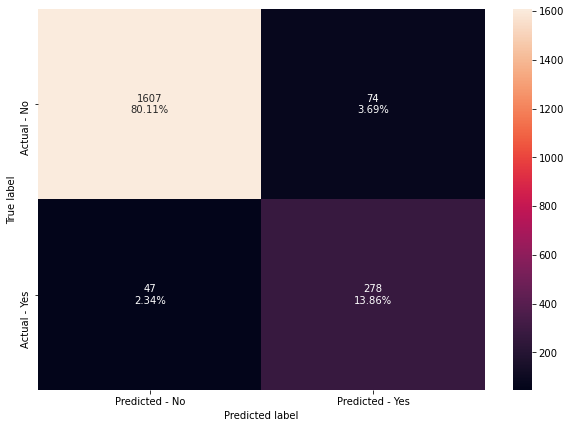

<IPython.core.display.Javascript object>

In [128]:
make_confusion_matrix(abc_over, y_test)

In [129]:
# Using our function to get metrics for the set
abc_score_over = get_metrics_score(abc_over)

Accuracy For Training Set:  0.9497921862011638
Accuracy For Test Set:  0.9396809571286141
Recall For Training Set:  0.86652977412731
Recall on test set:  0.8553846153846154
Precision For Training Set:  0.8307086614173228
Precision For Test Set:  0.7897727272727273


<IPython.core.display.Javascript object>

#### Observations
There model is one of the best thus far. Great metrics.

### Gradient Boost Over

In [130]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [131]:
# Using our function to get metrics for the set
gbc_score_over = get_metrics_score(gbc_over)

Accuracy For Training Set:  0.9677472984206151
Accuracy For Test Set:  0.9571286141575274
Recall For Training Set:  0.9127310061601642
Recall on test set:  0.8861538461538462
Precision For Training Set:  0.8907815631262525
Precision For Test Set:  0.8545994065281899


<IPython.core.display.Javascript object>

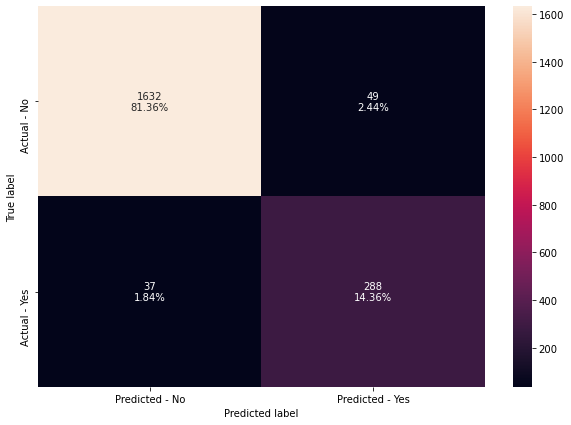

<IPython.core.display.Javascript object>

In [132]:
make_confusion_matrix(gbc_over, y_test)

In [133]:
# defining list of models
models2 = [
    bagging_estimator_over,
    dTree_over,
    bagging_lr_over,
    rf_estimator_over,
    abc_over,
    gbc_over,
]


acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in models2:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

<IPython.core.display.Javascript object>

In [134]:
# Making comparison frame to compare my metrics from the past 6 models
comparison_frame2 = pd.DataFrame(
    {
        "Model": [
            "Bagging Classifier Oversampled:",
            "Decision Tree Oversampled:",
            "Bagging Classifier Oversampled LR:",
            "Random Forest Oversampled:",
            "AdaBoost Oversampled:",
            "Gradient Boosting Oversampled:",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)
comparison_frame2

Model  Train_Accuracy  Test_Accuracy  \
0     Bagging Classifier Oversampled:            1.00           0.95   
1          Decision Tree Oversampled:            1.00           0.93   
2  Bagging Classifier Oversampled LR:            0.90           0.88   
3          Random Forest Oversampled:            1.00           0.95   
4               AdaBoost Oversampled:            0.95           0.94   
5      Gradient Boosting Oversampled:            0.97           0.96   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0          1.00         0.88             0.99            0.84  
1          1.00         0.84             1.00            0.77  
2          0.62         0.62             0.70            0.65  
3          1.00         0.82             1.00            0.88  
4          0.87         0.86             0.83            0.79  
5          0.91         0.89             0.89            0.85

<IPython.core.display.Javascript object>

#### Observations
All of these models are good with the exception of Bagging Classifier Oversampled LR.  They all have quite good metrics.  AdaBoost Oversampled and Gradient Boosting Oversmapled are incredible. I'm curious if I can improve Random Forest Oversampled.

### Model Building: Undersampled Data

In [135]:
# Fitting our RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [136]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 974
Before Under Sampling, counts of label 'No': 5041 

After Under Sampling, counts of label 'Yes': 974
After Under Sampling, counts of label 'No': 974 

After Under Sampling, the shape of train_X: (1948, 43)
After Under Sampling, the shape of train_y: (1948,) 



<IPython.core.display.Javascript object>

#### Observations
It is important to note after undersampling, the "No", match the Yes.

In [137]:
# Logistic Regression Undersampled
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

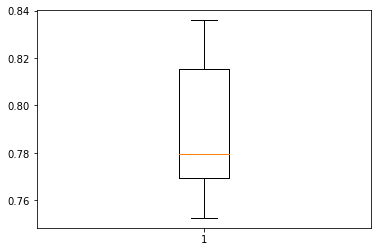

<IPython.core.display.Javascript object>

In [138]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [139]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.798255  0.786448   0.805468  0.795844

<IPython.core.display.Javascript object>

In [140]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.809975  0.763077   0.449275  0.565564

<IPython.core.display.Javascript object>

#### Observations
The validation set is substantially worse, as expected. I would update our hyperparameters off of this.

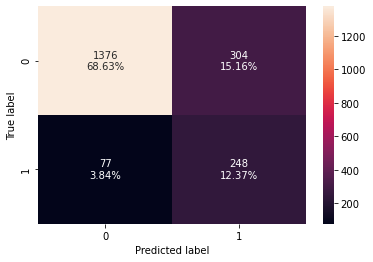

<IPython.core.display.Javascript object>

In [141]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

In [142]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [143]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.880632  0.418891   0.728571  0.531943

<IPython.core.display.Javascript object>

#### Observations
The LR is quite bad for recall and F1

In [144]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_reg_train_perf.T,
        log_reg_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Logistic Regression with oversampled data  \
Accuracy              0.880632                                   0.871454   
Recall                0.418891                                   0.850427   
Precision             0.728571                                   0.887761   
F1                    0.531943                                   0.868693   

           Regularised Logistic Regression  \
Accuracy                          0.731006   
Recall                            0.674866   
Precision                         0.760223   
F1                                0.715006   

           Logistic Regression with undersampled data  
Accuracy                                     0.798255  
Recall                                       0.786448  
Precision                                    0.805468  
F1                                           0.795844

<IPython.core.display.Javascript object>

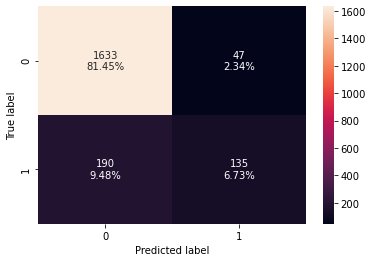

<IPython.core.display.Javascript object>

In [145]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

#### Observations
Logistic Regression with Undersampled data is the best out of these.

### Decision Tree Undersampled

In [146]:
# Undersampled Tree

# Fitting our undersampled tree
dTree_un = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

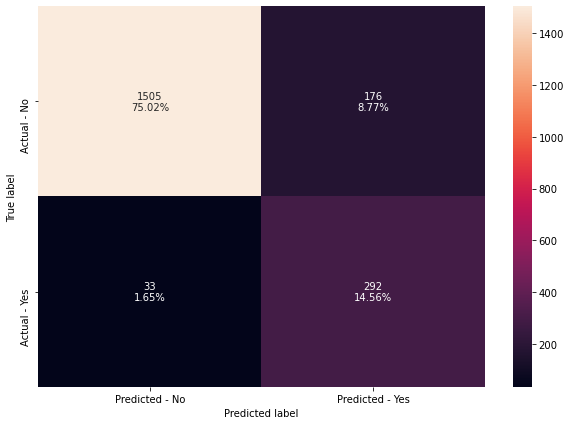

<IPython.core.display.Javascript object>

In [147]:
# Decision tree confusion matrix undersampled
make_confusion_matrix(dTree_un, y_test)

In [148]:
# Calculating recall score
def get_recall_score(model):
    pred_train = model.predict(X_train_un)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train_un, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

<IPython.core.display.Javascript object>

In [149]:
# Recall score for our decision tree undersampled
get_recall_score(dTree_un)

Recall on training set :  1.0
Recall on test set :  0.8984615384615384


<IPython.core.display.Javascript object>

In [150]:
# Accuracy for our decision tree
print("Accuracy on training set : ", dTree.score(X_train_un, y_train_un))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9411764705882353


<IPython.core.display.Javascript object>

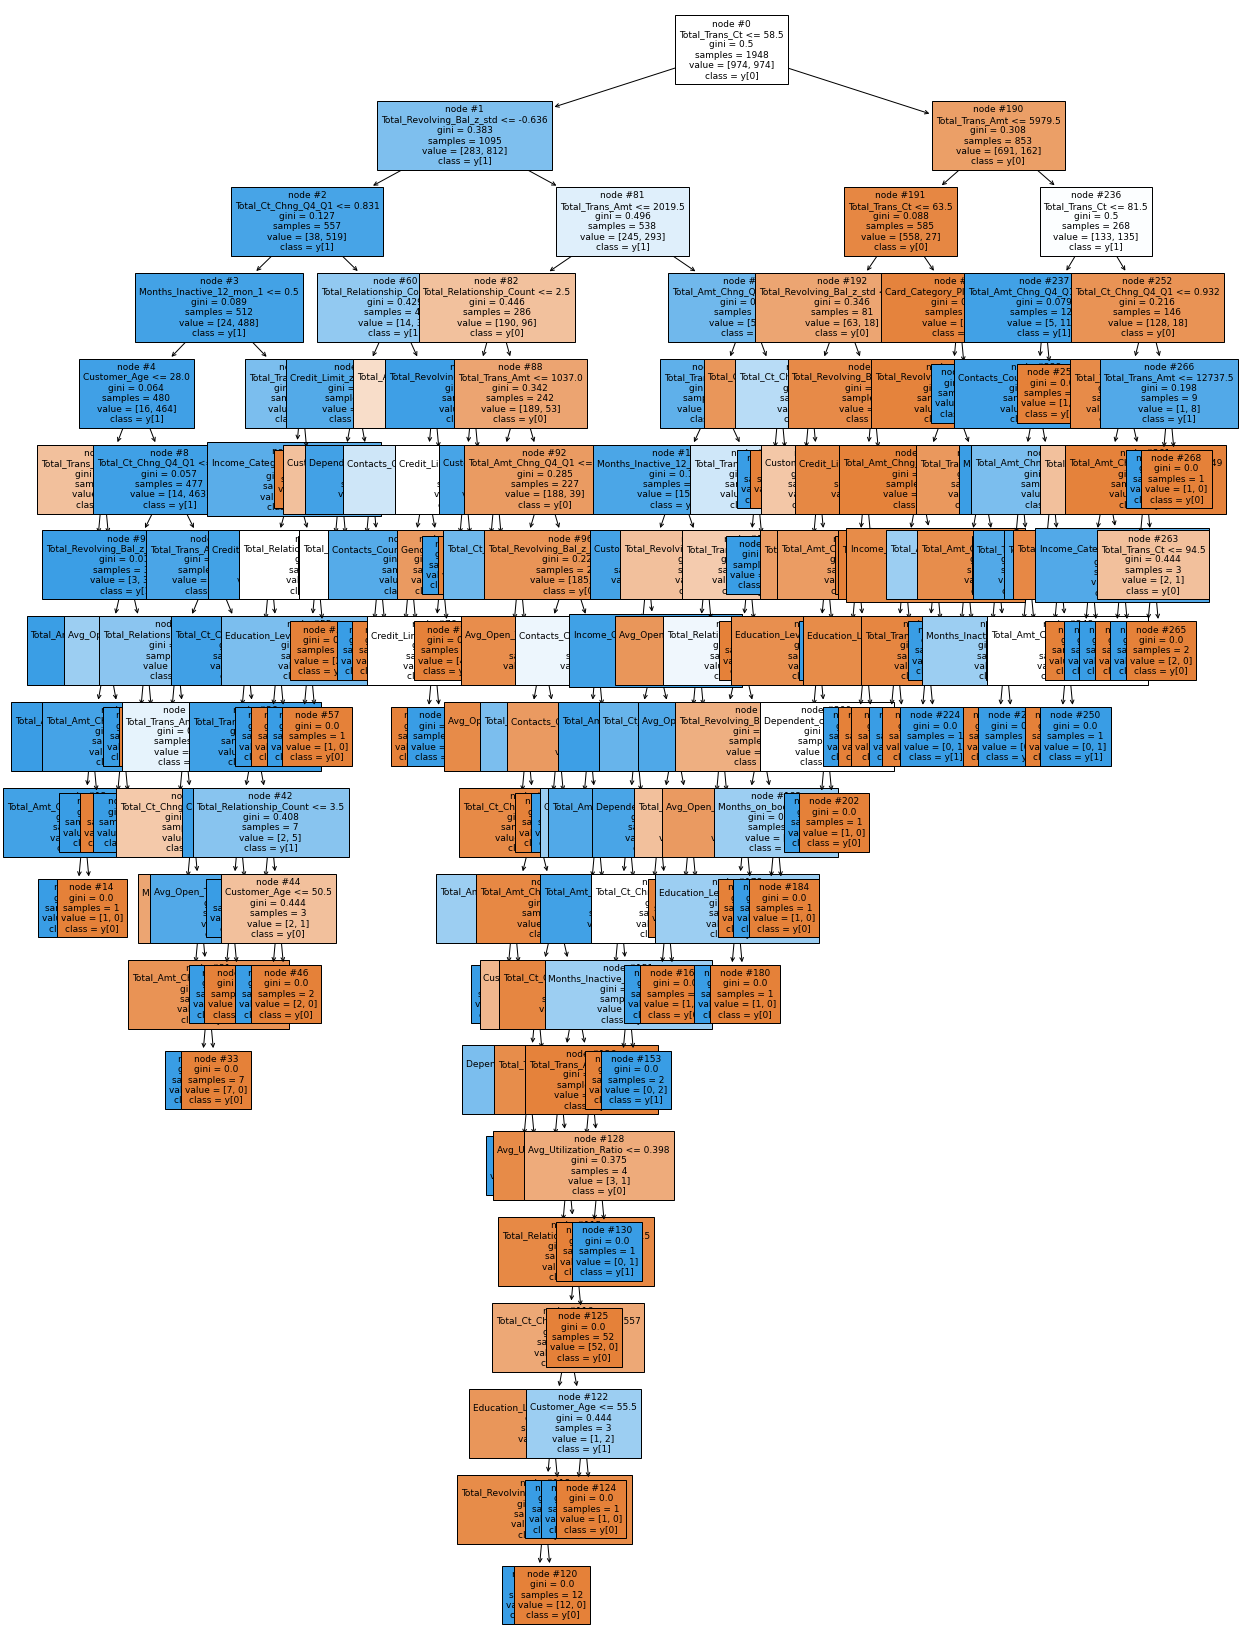

<IPython.core.display.Javascript object>

In [151]:
# Plotting our decision tree
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree_un,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [152]:
# Text of decision tree
print(tree.export_text(dTree_un, feature_names=feature_names, show_weights=True))

|--- Total_Trans_Ct <= 58.50
|   |--- Total_Revolving_Bal_z_std <= -0.64
|   |   |--- Total_Ct_Chng_Q4_Q1 <= 0.83
|   |   |   |--- Months_Inactive_12_mon_1 <= 0.50
|   |   |   |   |--- Customer_Age <= 28.00
|   |   |   |   |   |--- Total_Trans_Amt <= 1580.00
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Total_Trans_Amt >  1580.00
|   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- Customer_Age >  28.00
|   |   |   |   |   |--- Total_Ct_Chng_Q4_Q1 <= 0.57
|   |   |   |   |   |   |--- Total_Revolving_Bal_z_std <= -0.67
|   |   |   |   |   |   |   |--- Total_Amt_Chng_Q4_Q1 <= 1.02
|   |   |   |   |   |   |   |   |--- Total_Amt_Chng_Q4_Q1 <= 0.31
|   |   |   |   |   |   |   |   |   |--- Total_Amt_Chng_Q4_Q1 <= 0.30
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 21.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Total_Amt_Chng_Q4_Q1 >  0.30
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.0

<IPython.core.display.Javascript object>

#### Observations
Undersampled decision tree has amazing metrics, but is quite overfitted.

### Bagging Undersampled

Now I am going to do Undersampled model building.  This is where I change the class distribution of the majority class by decreasing it.

In [153]:
# Bagging Classifier Undersampled
bagging_estimator_un = BaggingClassifier(random_state=1)
bagging_estimator_un.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [154]:
# Metrics for the Bagging Classifier Underampled
bagging_estimator_score_un = get_metrics_score(bagging_estimator_un)

Accuracy For Training Set:  0.9441396508728179
Accuracy For Test Set:  0.9277168494516451
Recall For Training Set:  0.9866529774127311
Recall on test set:  0.9353846153846154
Precision For Training Set:  0.7484423676012462
Precision For Test Set:  0.7102803738317757


<IPython.core.display.Javascript object>

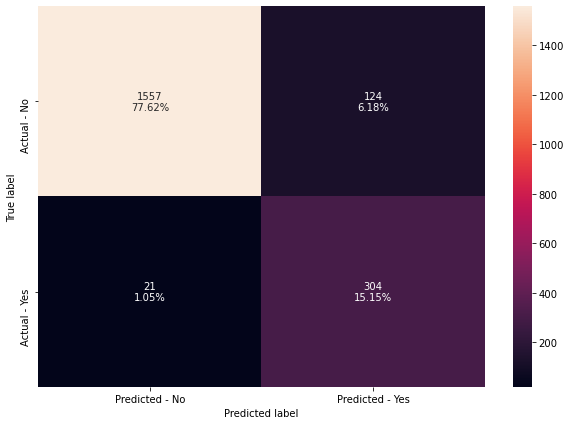

<IPython.core.display.Javascript object>

In [155]:
# Confusion matrix of bagging estimator
make_confusion_matrix(bagging_estimator_un, y_test)

#### Observations
The precision is a little low comparatively speaking, but recall and accuracy on test set are quite good.

### Random Forest Undersampled

In [156]:
# Train the random forest classifier
rf_estimator_un = RandomForestClassifier(random_state=1)
rf_estimator_un.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [157]:
# Random Forest statistics: Accuracy, Recall, and Precision
rf_estimator_score_un = get_metrics_score(rf_estimator_un)

Accuracy For Training Set:  0.9487946799667498
Accuracy For Test Set:  0.9312063808574277
Recall For Training Set:  1.0
Recall on test set:  0.9384615384615385
Precision For Training Set:  0.7597503900156006
Precision For Test Set:  0.7210401891252955


<IPython.core.display.Javascript object>

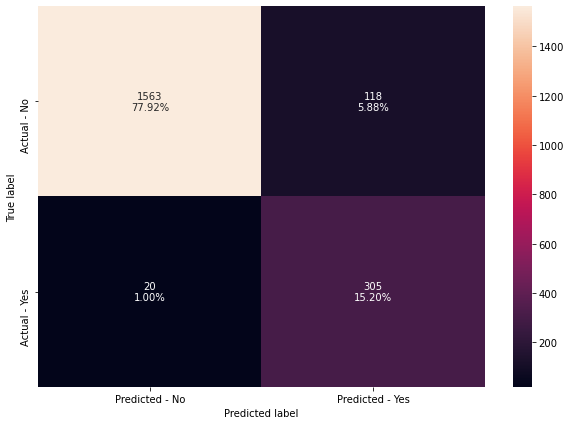

<IPython.core.display.Javascript object>

In [158]:
# Random Forest confusion matrix
make_confusion_matrix(rf_estimator_un, y_test)

#### Observations
Similar to the bagging undersampled model, this Random Forest lacks precision slightly. Still a good model. Overfitted.

### Bagging Undersampled

In [159]:
# Tuning our BaggingClassifier
bagging_estimator_un = BaggingClassifier(random_state=1)

parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# GridSearch
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_un = grid_obj.best_estimator_

bagging_estimator_un.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=30,
                  random_state=1)

<IPython.core.display.Javascript object>

In [160]:
# Tuned Bagging metrics
bagging_estimator_tuned_score_un = get_metrics_score(bagging_estimator_un)

Accuracy For Training Set:  0.943142144638404
Accuracy For Test Set:  0.9277168494516451
Recall For Training Set:  0.997946611909651
Recall on test set:  0.9476923076923077
Precision For Training Set:  0.7408536585365854
Precision For Test Set:  0.7064220183486238


<IPython.core.display.Javascript object>

In [161]:
# Undersampled Bagging Model
bagging_lr_un = BaggingClassifier(
    base_estimator=LogisticRegression(solver="liblinear", random_state=1),
    random_state=1,
)
bagging_lr_un.fit(X_train_un, y_train_un)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

<IPython.core.display.Javascript object>

In [162]:
# Using our new function to get our metrics
bagging_lr_score_un = get_metrics_score(bagging_lr_un)

Accuracy For Training Set:  0.8533665835411471
Accuracy For Test Set:  0.8384845463609173
Recall For Training Set:  0.8562628336755647
Recall on test set:  0.8461538461538461
Precision For Training Set:  0.5291878172588832
Precision For Test Set:  0.5009107468123861


<IPython.core.display.Javascript object>

#### Observations
This model is not very good.  Lacks accuracy and precision especially.

### Boosting Undersampled

In [163]:
# AdaBoost Undersampled
abc_un = AdaBoostClassifier(random_state=1)
abc_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [164]:
# Getting our metrics
abc_score_un = get_metrics_score(abc_un)

Accuracy For Training Set:  0.9349958437240232
Accuracy For Test Set:  0.9247258225324028
Recall For Training Set:  0.9630390143737166
Recall on test set:  0.9261538461538461
Precision For Training Set:  0.7254447022428461
Precision For Test Set:  0.7032710280373832


<IPython.core.display.Javascript object>

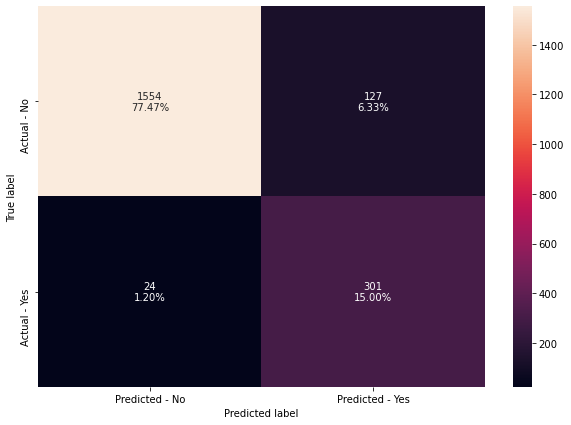

<IPython.core.display.Javascript object>

In [165]:
# Creating Confusion Matrix for AdaBoost Undersampled
make_confusion_matrix(abc_un, y_test)

#### Observations
The metrics are quite good for Boosting underasmpled, there are some errors.  The recall is quite high, and precision is sufficient.

### Gradient Boost Under

In [166]:
# Gradient Boost Undersampled
gbc_un = GradientBoostingClassifier(random_state=1)
gbc_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [167]:
# Getting our metrics
gbc_score_un = get_metrics_score(gbc_un)

Accuracy For Training Set:  0.9502909393183707
Accuracy For Test Set:  0.9386839481555334
Recall For Training Set:  0.9845995893223819
Recall on test set:  0.9507692307692308
Precision For Training Set:  0.7715205148833467
Precision For Test Set:  0.7427884615384616


<IPython.core.display.Javascript object>

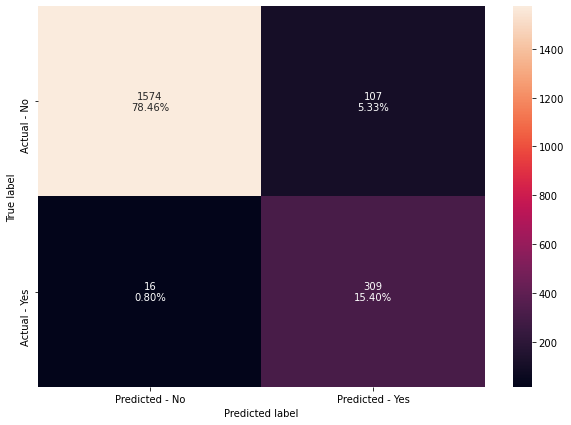

<IPython.core.display.Javascript object>

In [168]:
# Creating Confusion Matrix for Gradient Boost Undersampled
make_confusion_matrix(gbc_un, y_test)

#### Observations
This is slightly better than Adaboost.  It has better precision, and similar accuracy and recall on the test set.

### A Comparison of Our Models

In [169]:
# Undersampled Models List
models3 = [
    bagging_estimator_un,
    dTree_un,
    bagging_lr_un,
    rf_estimator_un,
    abc_un,
    gbc_un,
]


acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in models3:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

<IPython.core.display.Javascript object>

In [170]:
# Making comparison frame to compare my metrics from the past 6 models
comparison_frame3 = pd.DataFrame(
    {
        "Model": [
            "Bagging Classifier Undersampled:",
            "Decision Tree Undersampled:",
            "Bagging Classifier Undersampled LR:",
            "Random Forest:",
            "AdaBoost Oversampled:",
            "Gradient Boosting Undersampled:",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

<IPython.core.display.Javascript object>

In [171]:
# Concatenating our 3 comparison arrays
comparison_group = [comparison_frame1, comparison_frame2, comparison_frame3]
mergedcomparison = pd.concat(comparison_group)
mergedcomparison

Model  Train_Accuracy  Test_Accuracy  \
0          Default Bagging Classifier:            1.00           0.96   
1            Tuned Bagging Classifier:            1.00           0.96   
2               Bagging Classifier LR:            0.91           0.91   
3               Default Random Forest:            1.00           0.95   
4                            AdaBoost:            0.96           0.95   
5                   Gradient Boosting:            0.97           0.97   
0      Bagging Classifier Oversampled:            1.00           0.95   
1           Decision Tree Oversampled:            1.00           0.93   
2   Bagging Classifier Oversampled LR:            0.90           0.88   
3           Random Forest Oversampled:            1.00           0.95   
4                AdaBoost Oversampled:            0.95           0.94   
5       Gradient Boosting Oversampled:            0.97           0.96   
0     Bagging Classifier Undersampled:            0.94           0.93   
1          Decision Tree Undersampled:            0.93           0.90   
2  Bagging Classifier Undersampled LR:            0.85           0.84   
3                       Random Forest:            0.95           0.93   
4                AdaBoost Oversampled:            0.93           0.92   
5      Gradient Boosting Undersampled:            0.95           0.94   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0          0.98         0.82             1.00            0.91  
1          0.98         0.83             1.00            0.93  
2          0.56         0.57             0.79            0.79  
3          1.00         0.77             1.00            0.93  
4          0.86         0.83             0.90            0.88  
5          0.88         0.86             0.95            0.95  
0          1.00         0.88             0.99            0.84  
1          1.00         0.84             1.00            0.77  
2          0.62         0.62             0.70            0.65  
3          1.00         0.82             1.00            0.88  
4          0.87         0.86             0.83            0.79  
5          0.91         0.89             0.89            0.85  
0          1.00         0.95             0.74            0.71  
1          1.00         0.90             0.68            0.62  
2          0.86         0.85             0.53            0.50  
3          1.00         0.94             0.76            0.72  
4          0.96         0.93             0.73            0.70  
5          0.98         0.95             0.77            0.74

<IPython.core.display.Javascript object>

#### Observations
Overall, most of the models I made perform quite well with the exception of Bagging Classifier LR for test recall.  Accuracy is incredible on all of the models.  Otherwise, the rest of them have their own pros and cons.  For example, one might have a very high recall, but it overfits.  Or one may be very percise, but the recall is poor on the test set.  The criteria I am going to use going forward is based on models that perform well in every aspect.  I also do not want to, for example, grab 3 varaitions of a bagging model.  I want some variety in the types of the model for hyperparameters.

I am going to futher tune the following 3 models:

> Tuned Bagging Undersampled

> Random Forest Oversampled

> Gradient Boosting Undersampled

The reason I am choosing these three is because of their pre-tuned metrics.  These are the best performing models, and I wish to obtain higher recall and precision scores for these models.  I will accomplish that through RandomSearch.

### Hyperparameter Tuning using RandomSearch

In [172]:
# Using RandomSearch I am going to tune the 3 models mentioned
models = []

# Appending models into the list, I am putting in the 3 classifiers I want
models.append(("Tuned Bagging:", BaggingClassifier(random_state=1)))
models.append(("Random Forest Oversampled", RandomForestClassifier(random_state=1)))
models.append(
    ("Gradient Boosting Undersampled", GradientBoostingClassifier(random_state=1))
)

results = []
names = [
    "Tuned Bagging",
    "Random Forest Oversampled",
    "Gradient Boosting Undersampled",
]


# Cross Validation
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))

print("\n" "Test Performance:" "\n")

for name, model in models:
    model.fit(X_test, y_test)
    scores = recall_score(y_test, model.predict(X_test)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Tuned Bagging:: 79.1593973037272
Random Forest Oversampled: 72.79249273063706
Gradient Boosting Undersampled: 84.08828971715569

Training Performance:

Tuned Bagging:: 97.74127310061603
Random Forest Oversampled: 100.0
Gradient Boosting Undersampled: 88.39835728952772

Test Performance:

Tuned Bagging:: 97.23076923076923
Random Forest Oversampled: 100.0
Gradient Boosting Undersampled: 96.0


<IPython.core.display.Javascript object>

#### Observations
Gradient Boosting Undersampled is the best out of the three for cross validation.  Random Forest Oversampled is quite overfitted.  They all are good models.  I prefer to use Gradient Boosting Undersampled going forward, and then bagging would be my second prefered model.

### Final Model

In [173]:
# Calculating Training Set metrics
Gradient_grid_val = model_performance_classification_sklearn(gbc_un, X_train, y_train)
print("Training performance:")
Gradient_grid_val

Training performance:


Accuracy  Recall  Precision        F1
0  0.950291  0.9846   0.771521  0.865133

<IPython.core.display.Javascript object>

In [174]:
# Calculating Test Set metrics
Gradient_grid_val = model_performance_classification_sklearn(gbc_un, X_test, y_test)
print("Test performance:")
Gradient_grid_val

Test performance:


Accuracy    Recall  Precision        F1
0  0.938684  0.950769   0.742788  0.834008

<IPython.core.display.Javascript object>

In [175]:
# Calculating Validation Set metrics
Gradient_grid_val = model_performance_classification_sklearn(gbc_un, X_val, y_val)
print("Validation performance:")
Gradient_grid_val

Validation performance:


Accuracy    Recall  Precision        F1
0   0.94414  0.953846   0.761671  0.846995

<IPython.core.display.Javascript object>

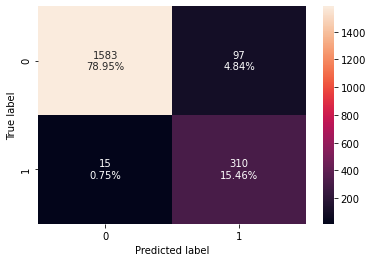

<IPython.core.display.Javascript object>

In [176]:
# creating confusion matrix
confusion_matrix_sklearn(gbc_un, X_val, y_val)

#### Observations
The validation metrics after hyperparameter tuning are excellent! Recall, Accuracy, and Precision are all very high for our sample! Are Type II errors are exceptionally low.  

Our test set reaches .95 Recall, .74 Precision, and .93 Accuracy!

In [177]:
# I will now create the ideal parameters for Gradient Boosting using GridSearchCV
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

In [178]:
# Gradient Boost Classifier
gbc_tuned_un = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Parameters for Gradient Boost
parameters = {
    "learning_rate": [0.1, 0.2, 0.01, 0.05, 1],
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# GridSearch
grid_obj = GridSearchCV(gbc_tuned_un, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned_un = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_un.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=0.9, n_estimators=200,
                           random_state=1, subsample=1)

<IPython.core.display.Javascript object>

#### Observations
My ideal parameters are 

random_state=1

learning_rate=1

max_features=0.9

n_estimators=200

random_state=1

subsample=1


### Pipeline

In [179]:
from sklearn.preprocessing import OneHotEncoder

# Our non categorical variables
numerical_features = [
    "Customer_Age",
    "Months_on_book",
    "Total_Relationship_Count",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# Imputing median for our numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# Our categorical variables
categorical_features = [
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

# Imputing the most frequent category for categorical variables. Imputing through SimpleImputer
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

In [180]:
# Creating a copy of our file for Pipeline
data_pipeline = file.copy()

<IPython.core.display.Javascript object>

In [181]:
# Dropping our target variable, Attrition_Flag, as always
X = data_pipeline.drop(columns="Attrition_Flag")
Y = data_pipeline["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [182]:
# Splitting my data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 20) (3039, 20)


<IPython.core.display.Javascript object>

#### Observations
This is our 70:30 split for train and test.

In [183]:
# Making the Pipeline. I am implementing the ideal parameters shown earlier in GridSearchCV
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "Gradient",
            GradientBoostingClassifier(
                learning_rate=1,
                max_features=0.9,
                n_estimators=200,
                subsample=1,
                random_state=1,
            ),
        ),
    ]
)
# Fitting my model!
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                     

<IPython.core.display.Javascript object>

## Conclusion

Based on EDA and model building, I can conclude the following key takeaways:

>Males churn at a higher rate.

>Proportionally, single people tend to churn more frequently than married.

>Attrited Customers make less purchases, which isn't surprising.  Why would people who don't use it, keep it? They also make less purchases as they get older in general for both the Existing Customers and Attrited Customers.

>The more relationships with the bank, the more likely they are to not churn.  Fewer relationships churn more frequently.

>The most important variables  for churning, according to this model, are Total_Trans_Ct, Total_Revolving_Bal, and Total_Trans_Amt.


Recommendations to identify the potential churn customers:

>I recommend for Thera bank to look for the current customers that have low relationships with the bank, and they rarely use their card.  Maybe they could give them some incentive to stay.  Extending an offer of rewards to these customers could see some benefits in maintaining these customer bases.  They also could try to appeal the other relationships the bank offers to them, and maybe increase the relationship count.  This could make them stay longer.